# House Prices Prediction - via Linear Regression 

Author - Udhai Pratap Singh

For detailed analysis in jupyter notebook, please refer: https://github.com/audi0786/dsc-phase-2-project.git

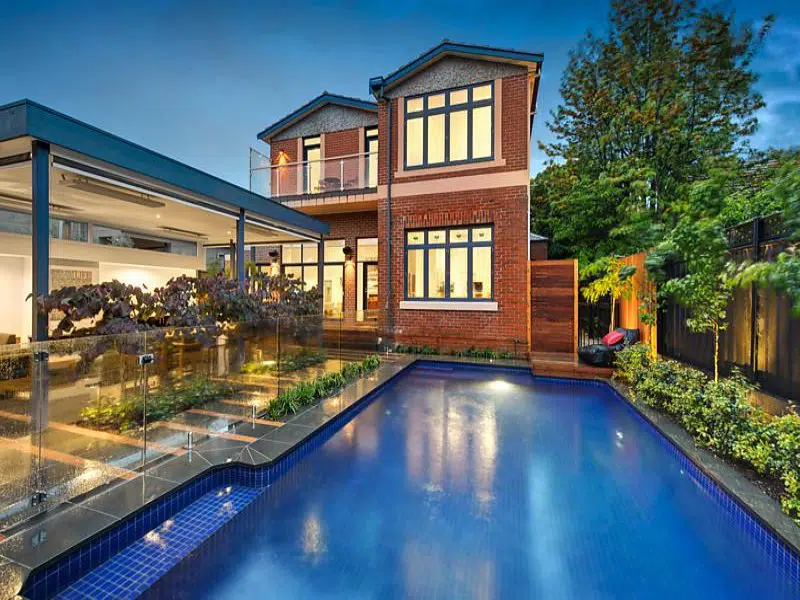



## Project Overview

1. This project analyzes the house prices in King County, WA, USA. The analysis ails to guide Prime House Real Estate Agency is advising their clients on houses prices in the area.
2. They are looking for insights whether houses are overpriced/underpriced and what is the impact of factors like waterfront, view and renovations on a house price.



### Data

This project uses the King County House Sales dataset, which can be found in  `kc_house_data.csv` in the data folder in this repo. The description of the column names can be found in `column_names.md` in the same folder. As you will notice that some of the column names are somewhat ambigious and for further reference you can go to the original source of the data at: (https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/)


### Business Problem

Prime House Agency is a renowned real estate agency active in the King County and they want help in giving prospective clients advice 
on houses prices in the area. They are looking for insights in which houses are overpriced/underpriced and what is the impact of factors 
like waterfront, view and renovations on a house price. 


### Methods

In order to provide advice on the factors influencing the house prices, I have performed Multiple Linear Regression of this dataset. 

The main steps in my analysis of this project are as follows:
1. Data cleaning - involving data check, null values, dtypes as well as referring to the original source of data. 
2. Feature engineering - where we added a few new features relevant to our business problem like some features like Time_since_renovation 
create via linear operations on existing features. We also created polynomial features of the top 3 most important features. 
Also includes features scaling, normalizing, and splitting data in continuous, discrete, categorical features. 

3. Baseline Model - performed linear regression on a baseline model involving 

4. Multiple model - here we take an iterative approach to which features to keep based on key metrics like r2_test, mse_test, and adj R2_train. 

5. Top 10 most important features - using Recursive feature elimination from sklearn and performing Linear Regression on data we choose 10 features and explain its relevance to Prime Real estate agency in context of our business problem of helping the customers in buying or selling the houses at the right price. 

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import black

%matplotlib inline

In [2]:
! ls data
!pwd

cleaned_df.csv
column_names.md
kc_house_data.csv
preprocessed.csv
/c/Users/udhai/Documents/Flatiron/dsc-data-science-env-config/Project2_DAT/dsc-phase-2-project


In [3]:
kc_house_df = pd.read_csv('data/kc_house_data.csv', sep = ',', header=0)

In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
kc_house_df.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
from IPython.display import Markdown, display

display(Markdown("data/column_names.md"))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## 1. Data Cleaning

In [6]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
kc_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
## We have to first deal with the null values in waterfront, view and yr_renovated columns and then we will
#move to review dtypes of all columns


In [9]:
kc_house_df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [10]:
kc_house_df['yr_renovated'].mode()

0    0.0
Name: yr_renovated, dtype: float64

In [11]:
kc_house_df['waterfront'].value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [12]:
kc_house_df['waterfront'].mode()

0    0.0
Name: waterfront, dtype: float64

In [13]:
kc_house_df['view'].value_counts(dropna=False)

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [14]:
kc_house_df['view'].mode()

0    0.0
Name: view, dtype: float64

#### Filling the nan values to complete the dataframe

In [15]:
kc_house_df['waterfront'] = kc_house_df['waterfront'].fillna(value = kc_house_df['waterfront'].mode()[0])
kc_house_df['view'] = kc_house_df['view'].fillna(kc_house_df['view'].mode()[0])
kc_house_df['yr_renovated'] = kc_house_df['yr_renovated'].fillna(kc_house_df['yr_renovated'].mode()[0] )
#it is worth noting that although yr_renovated is a continuous feature but for our purposes we will take a mode value 
# this will also ensure we dont get a decimal value for yr_renovated

In [16]:
# pd.plotting.scatter_matrix(kc_house_df,figsize  = [18,18]);
# plt.show();

In [17]:
kc_house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
from pathlib import Path
filepath = Path('data/cleaned_df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
kc_house_df.to_csv(filepath)

## Saving the cleaned and non-NaN dataframe as a back up and also for more accessability if we have to 
## access in more jupyter notebook down the track!!

In [19]:
data = kc_house_df.copy()

waterfront_gb = data.groupby('waterfront')['price']

### Performing a couple of groupby operations to get a better idea of the data

In [20]:
data.groupby('waterfront').agg(['max', 'min', 'count', 'median', 'mean'])

<ipython-input-20-7878df879586>:1: FutureWarning: ['date', 'sqft_basement'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('waterfront').agg(['max', 'min', 'count', 'median', 'mean'])


id                                                \
                   max        min  count        median          mean   
waterfront                                                             
0.0         9900000190    1000102  21451  3.904940e+09  4.581329e+09   
1.0         9808700762  121029034    146  3.692780e+09  4.454969e+09   

                price                                           bedrooms      \
                  max       min  count     median          mean      max min   
waterfront                                                                     
0.0         7700000.0   78000.0  21451   450000.0  5.322862e+05       33   1   
1.0         7060000.0  285000.0    146  1510000.0  1.717215e+06        6   1   

                                   bathrooms                                \
            count median      mean       max   min  count median      mean   
waterfront                                                                   
0.0         21451    3.0  3.373363      8.00  0.50  21451   2.25  2.111790   
1.0           146    3.0  3.349315      6.75  0.75    146   2.50  2.708904   

           sqft_living                                  sqft_lot               \
                   max  min  count  median         mean      max   min  count   
waterfront                                                                      
0.0              13540  370  21451  1910.0  2072.396485  1651359   520  21451   
1.0              10040  440    146  2900.0  3244.753425   505166  1989    146   

                                  floors                              view  \
             median          mean    max  min  count median      mean  max   
waterfront                                                                   
0.0          7590.0  15026.095846    3.5  1.0  21451    1.5  1.493170  4.0   
1.0         17730.5  25870.883562    3.0  1.0    146    2.0  1.630137  4.0   

                                        condition                              \
            min  count median      mean       max min  count median      mean   
waterfront                                                                      
0.0         0.0  21451    0.0  0.209174         5   1  21451    3.0  3.408932   
1.0         0.0    146    4.0  3.760274         5   1    146    3.0  3.541096   

           grade                             sqft_above                      \
             max min  count median      mean        max  min  count  median   
waterfront                                                                    
0.0           13   3  21451    7.0  7.649900       9410  370  21451  1560.0   
1.0           12   5    146    9.0  8.835616       7680  440    146  2200.0   

                        yr_built                                    \
                   mean      max   min  count  median         mean   
waterfront                                                           
0.0         1783.695259     2015  1900  21451  1975.0  1971.059018   
1.0         2508.760274     2014  1905    146  1959.5  1962.280822   

           yr_renovated                                zipcode                \
                    max  min  count median        mean     max    min  count   
waterfront                                                                     
0.0              2015.0  0.0  21451    0.0   66.537644   98199  98001  21451   
1.0              2009.0  0.0    146    0.0  395.013699   98199  98004    146   

                                       lat                            \
             median          mean      max      min  count    median   
waterfront                                                             
0.0         98065.0  98077.824157  47.7776  47.1559  21451  47.57200   
1.0         98075.0  98096.712329  47.7729  47.3276    146  47.54815   

                          long                                        \
                 mean      max      min  count    median        mean   
waterfront 

In [21]:
data.groupby('waterfront').price.mean()

waterfront
0.0    5.322862e+05
1.0    1.717215e+06
Name: price, dtype: float64

### This is a telling sign for our analysis, pointing towards the fact that the houses with waterfront are generally (not always) more expensive than the remaining houses!!

In [22]:
# TO make the prices comparable irrespective of the house size, no of bedrooms etc, we are creating here a 
# a couple of interaction features which we will keep in the data df for now. 

data['price_sqft_living'] = (kc_house_df.price / kc_house_df.sqft_living).astype(int)
data['price_sqft_lot'] = (kc_house_df.price / kc_house_df.sqft_lot).astype(int)
data['price_sqft_above'] = (kc_house_df.price / kc_house_df.sqft_above).astype(int)
data['price_sqft_living15'] = (kc_house_df.price / kc_house_df.sqft_living15).astype(int)
data['price_sqft_lot15'] = (kc_house_df.price / kc_house_df.sqft_lot15).astype(int)



In [23]:
gp7 = data.groupby(['zipcode', 'view']).price_sqft_living.agg(['max', 'min', 'count', 'median', 'mean']).reset_index()
gp7.head(15)

,zipcode,view,max,min,count,median,mean
0,98001,0.0,395.238095,88.698630,348,146.950302,151.158098
1,98001,2.0,233.405172,128.348214,7,162.621359,165.434996
2,98001,3.0,166.602564,111.398964,4,133.943626,136.472195
3,98001,4.0,195.255474,134.408602,2,164.832038,164.832038
4,98002,0.0,247.474747,87.588235,198,147.272920,151.282002
5,98002,2.0,129.807692,129.807692,1,129.807692,129.807692
6,98003,0.0,258.119658,88.150289,250,154.038922,156.488341
7,98003,1.0,181.818182,135.495335,6,150.628205,155.685234
8,98003,2.0,246.511628,89.204658,18,163.129845,162.180957
9,98003,3.0,205.882353,109.411765,6,171.048168,169.383702


In [ ]:
sns.factorplot(data=data, x="lat", y="price_sqft_living", col='grade')

C:\Users\udhai\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


In [214]:
kc_house_df[kc_house_df.bedrooms == 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_house,Time_since_renovation
1658,9126101740,2014-12-04,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,3,8,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580,2014,17,0.0
4031,685000115,2014-10-07,2150000.0,8,6.00,4340,9415,2.0,0.0,0.0,3,8,4340,0.0,1967,0.0,98004,47.6316,-122.202,2050,9100,2014,47,0.0
4063,7226500100,2015-02-19,373000.0,8,3.00,2850,12714,1.0,0.0,0.0,3,7,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942,2015,56,0.0
6168,1873400020,2014-07-03,340000.0,8,2.75,2790,6695,1.0,0.0,0.0,3,7,1470,1320.0,1977,0.0,98133,47.7565,-122.331,1760,7624,2014,37,0.0
9068,6746700615,2015-03-18,700000.0,8,2.50,2280,3000,1.5,0.0,0.0,3,7,1210,1070.0,1911,0.0,98105,47.6675,-122.316,1610,3000,2015,104,0.0
9443,2769600590,2014-10-16,900000.0,8,4.00,4020,7500,1.0,0.0,0.0,3,8,2010,2010.0,1968,0.0,98107,47.6732,-122.363,1560,3737,2014,46,0.0
10946,1652500060,2014-07-11,1650000.0,8,2.75,4040,20666,1.0,0.0,0.0,4,9,2020,2020.0,1962,0.0,98004,47.6340,-122.221,3670,20500,2014,52,0.0
12872,8813400155,2014-12-19,808000.0,8,3.75,3460,4600,2.0,0.0,0.0,3,7,2860,600.0,1987,0.0,98105,47.6617,-122.289,2170,3750,2014,27,0.0
15056,7418000130,2014-12-11,430000.0,8,3.25,4300,10441,2.0,0.0,0.0,4,8,2800,1500.0,1979,0.0,98059,47.4786,-122.131,1780,10457,2014,35,0.0
15656,8141200080,2014-08-14,680000.0,8,2.75,2530,4800,2.0,0.0,0.0,4,7,1390,1140.0,1901,0.0,98112,47.6241,-122.305,1540,4800,2014,113,0.0


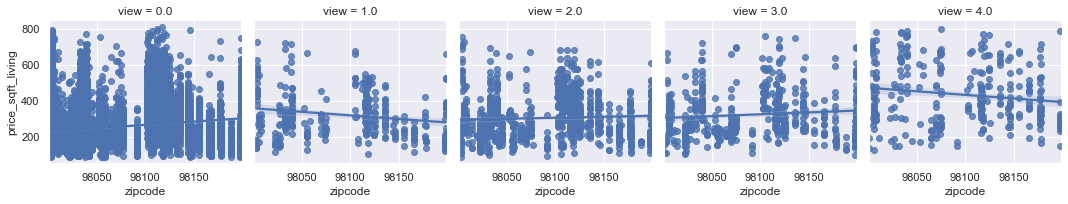

In [233]:
g = sns.FacetGrid(data , col="view") 
sns.set(rc = {'figure.figsize':(25,25)})
g.map(sns.regplot, "zipcode", "price_sqft_living")

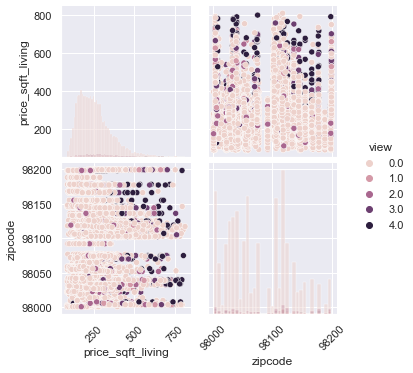

In [226]:
sns.set(rc = {'figure.figsize':(15,15)})
g = sns.pairplot(data[["price_sqft_living", "zipcode", "view"]], hue="view", diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [24]:
## Even a very cursory look at the above table indicates that view is not a good predictor for house prices
## as the values should increase the increase in the value of view for the same zipcode. But that is not happening
## We have deliberatey calculated the impact of view of price per sq ft so that we do not have to take 
## other features like bedroom or bathroom into account as that would overly aggregate our group by data
## there is not stopping us the sorting group by with other features like bedroom and bathroom to make the 
## comparision as accurate as possible, but that will further dilute the count for each row, which already is low.


## This indeed is counterintuitive that view is not a good indicator for our house prices. 
## on the other hand we should not be surprized, as the view column is ordinal and it does involve a lot of 
## subjivity is grading a house's view. 

In [25]:
# No more null values and now we proceed to review the dtypes for all the columns with object dtypes which are
# date and sqft_basement

In [26]:
kc_house_df['sqft_basement'].value_counts()


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [27]:
kc_house_df['date'] = pd.to_datetime(kc_house_df.date)

# pd.set_option('display.max_rows', None)
kc_house_df['sqft_basement'] = kc_house_df['sqft_basement'].replace('?',"0").astype(float)
kc_house_df['sqft_basement'].value_counts()
#sqft_basement is object as it columns contains a lot of ? instead of null values. We need to replace it with mean for a continous column


0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [28]:

kc_house_df['year_sold'] = kc_house_df.date.dt.year


In [29]:
kc_house_df['year_sold'].astype(float)

0        2014.0
1        2014.0
2        2015.0
3        2014.0
4        2015.0
          ...  
21592    2014.0
21593    2015.0
21594    2014.0
21595    2015.0
21596    2014.0
Name: year_sold, Length: 21597, dtype: float64

In [30]:
kc_house_df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [31]:
kc_house_df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [32]:
kc_house_df['date'].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64

## 2. Feature engineering

In [33]:
## The date_columns provide some very useful information.
## But in order to extract the contribution of these features to our predictee - prices we have to 
## change them in a more useful format


kc_house_df['Age_house'] = kc_house_df['year_sold'] - kc_house_df['yr_built']
# Age_house reflects the age of the house at the time of sale

kc_house_df.Age_house.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: Age_house
Non-Null Count  Dtype
--------------  -----
21597 non-null  int64
dtypes: int64(1)
memory usage: 168.9 KB


In [34]:
kc_house_df.Age_house.value_counts()

 9      472
 8      443
 11     431
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: Age_house, Length: 117, dtype: int64

In [35]:
# Above it is strange to see age_house with 12 values of -1. Lets investigate whats happening

kc_house_df[kc_house_df.Age_house < 0]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_house
1761,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0.0,0.0,3,10,2860,710.0,2015,0.0,98040,47.5784,-122.226,2230,10000,2014,-1
2685,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0.0,0.0,3,6,710,0.0,2015,0.0,98144,47.5756,-122.316,1440,4800,2014,-1
7519,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0.0,0.0,3,8,2730,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126,2014,-1
8032,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0.0,0.0,3,8,1000,200.0,2015,0.0,98144,47.6001,-122.298,1320,1852,2014,-1
14475,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0.0,0.0,3,9,1280,290.0,2015,0.0,98199,47.6514,-122.385,1570,6000,2014,-1
17084,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0.0,0.0,3,8,1380,0.0,2015,0.0,98122,47.6074,-122.305,1480,3600,2014,-1
19789,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0.0,0.0,3,9,1320,0.0,2015,0.0,98122,47.6047,-122.305,1380,1495,2014,-1
20754,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0.0,0.0,3,8,2990,0.0,2015,0.0,98133,47.7384,-122.348,1970,18110,2014,-1
20836,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0.0,0.0,3,9,2760,970.0,2015,0.0,98103,47.6725,-122.330,1800,4560,2014,-1
20947,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0.0,0.0,3,9,900,140.0,2015,0.0,98144,47.5951,-122.301,1350,3000,2014,-1


In [36]:
## This might be indicating the houses which were pre-sold even before finishing. 
## For such values, we will change the values of the age feature to 0. 
## This will help to take log values down the line while normalizing all the features. 
kc_house_df.loc[kc_house_df['Age_house'] < 0, 'Age_house'] = 0
kc_house_df.Age_house.value_counts()


9      472
8      443
0      442
11     431
10     428
      ... 
112     33
113     28
115     26
81      23
80      21
Name: Age_house, Length: 116, dtype: int64

In [37]:
kc_house_df['Time_since_renovation'] = kc_house_df['year_sold'] - kc_house_df['yr_renovated']
#Time_since_renovation reflects the time since renovation at the time of house sale
kc_house_df['Time_since_renovation']

0        2014.0
1          23.0
2        2015.0
3        2014.0
4        2015.0
          ...  
21592    2014.0
21593    2015.0
21594    2014.0
21595    2015.0
21596    2014.0
Name: Time_since_renovation, Length: 21597, dtype: float64

In [38]:
kc_house_df.loc[kc_house_df['Time_since_renovation'] == 2014.0, 'Time_since_renovation'] = 0
kc_house_df.loc[kc_house_df['Time_since_renovation'] == 2015.0, 'Time_since_renovation'] = 0
    
# THis is because if the values are 2014.0 and 2015.0 the house have not been renovated or no info on renovation. 

In [39]:
kc_house_df['Time_since_renovation'].value_counts()

0.0     20921
1.0        37
8.0        34
10.0       29
11.0       27
        ...  
53.0        1
66.0        1
60.0        1
64.0        1
61.0        1
Name: Time_since_renovation, Length: 70, dtype: int64

In [40]:
kc_house_df[kc_house_df.Time_since_renovation < 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_house,Time_since_renovation
2293,8712100320,2014-07-28,585000.0,5,2.75,2350,4178,1.5,0.0,0.0,3,8,1520,830.0,1922,2015.0,98112,47.6388,-122.300,1920,4178,2014,92,-1.0
7090,9141100005,2014-10-28,285000.0,4,3.50,2770,10505,2.0,0.0,0.0,3,8,2770,0.0,1940,2015.0,98133,47.7412,-122.355,1760,10505,2014,74,-1.0
11587,7284900030,2014-05-22,850000.0,4,3.25,3090,6744,2.0,0.0,4.0,3,9,3090,0.0,1923,2015.0,98177,47.7680,-122.388,2020,6656,2014,91,-1.0
14845,3585900665,2014-06-06,805000.0,5,2.50,4600,19831,1.0,0.0,3.0,3,9,2300,2300.0,1956,2015.0,98177,47.7608,-122.378,2890,19831,2014,58,-1.0
15673,3585900190,2014-10-06,825000.0,3,2.50,3400,38400,1.0,0.0,4.0,3,8,1870,1530.0,1955,2015.0,98177,47.7611,-122.372,3400,24338,2014,59,-1.0
18560,8935100100,2014-07-01,476000.0,4,3.00,2890,6885,1.0,0.0,0.0,3,7,1590,1300.0,1945,2015.0,98115,47.6763,-122.282,2180,6885,2014,69,-1.0


In [41]:
# Time_since_renovation with -1 values may means they have been renovated after they were sold. 
# Since, in our analysis we have to measure the impact of renovation on sell price, hence we can 
# change these values to 0. Also, there are only 6 such values, whcih should not have a big impact on our analysis. 
kc_house_df.loc[kc_house_df['Time_since_renovation'] < 0, 'Time_since_renovation'] = 0
kc_house_df.Time_since_renovation.value_counts()

0.0     20927
1.0        37
8.0        34
10.0       29
11.0       27
        ...  
65.0        1
48.0        1
60.0        1
80.0        1
64.0        1
Name: Time_since_renovation, Length: 69, dtype: int64

In [42]:
## Now since we have extracted information from date, yr_built, yr_renovated,
## we will not include that in our analysis. But lets ensure they are part of our cat or continous features list.

In [43]:
kc_house_df.describe(include=np.number)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_house,Time_since_renovation
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,43.323841,0.632264
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,29.376456,4.424782
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,18.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,40.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,63.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000,80.000000


In [44]:
unique_values = kc_house_df.nunique().drop('id')
unique_values



date                      372
price                    3622
bedrooms                   12
bathrooms                  29
sqft_living              1034
sqft_lot                 9776
floors                      6
waterfront                  2
view                        5
condition                   5
grade                      11
sqft_above                942
sqft_basement             303
yr_built                  116
yr_renovated               70
zipcode                    70
lat                      5033
long                      751
sqft_living15             777
sqft_lot15               8682
year_sold                   2
Age_house                 116
Time_since_renovation      69
dtype: int64

In [45]:
kc_house_cont_features = unique_values[(unique_values > 100)].index.to_list()
kc_house_cont_features.remove('yr_built')
kc_house_cont_features.remove('date')
kc_house_cont_features

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Age_house']

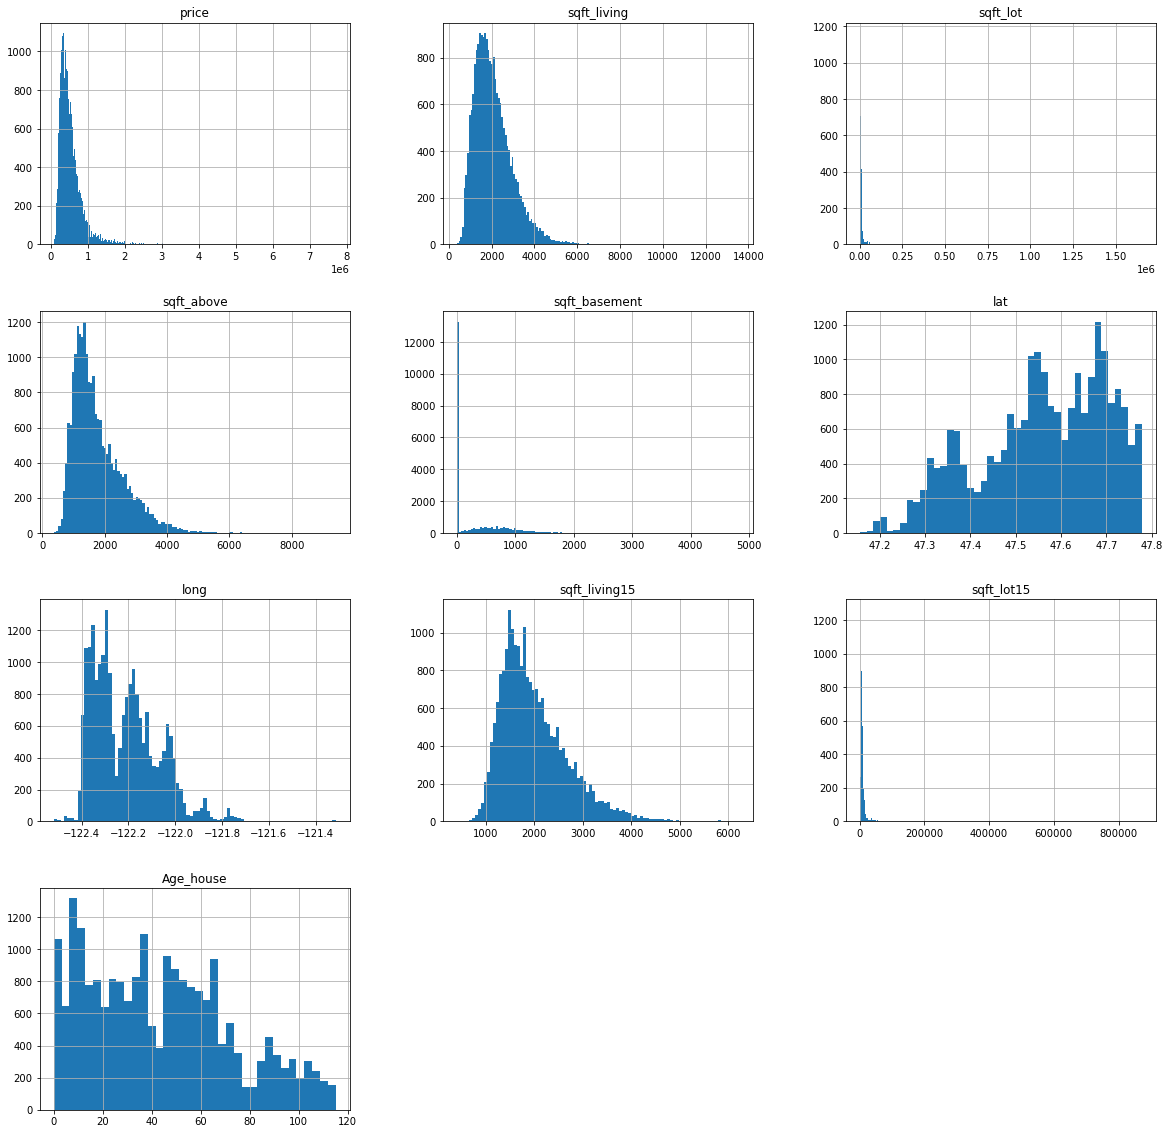

In [46]:
continuous_df = kc_house_df[kc_house_cont_features]
continuous_df.hist(figsize= [20,20], bins ='auto');

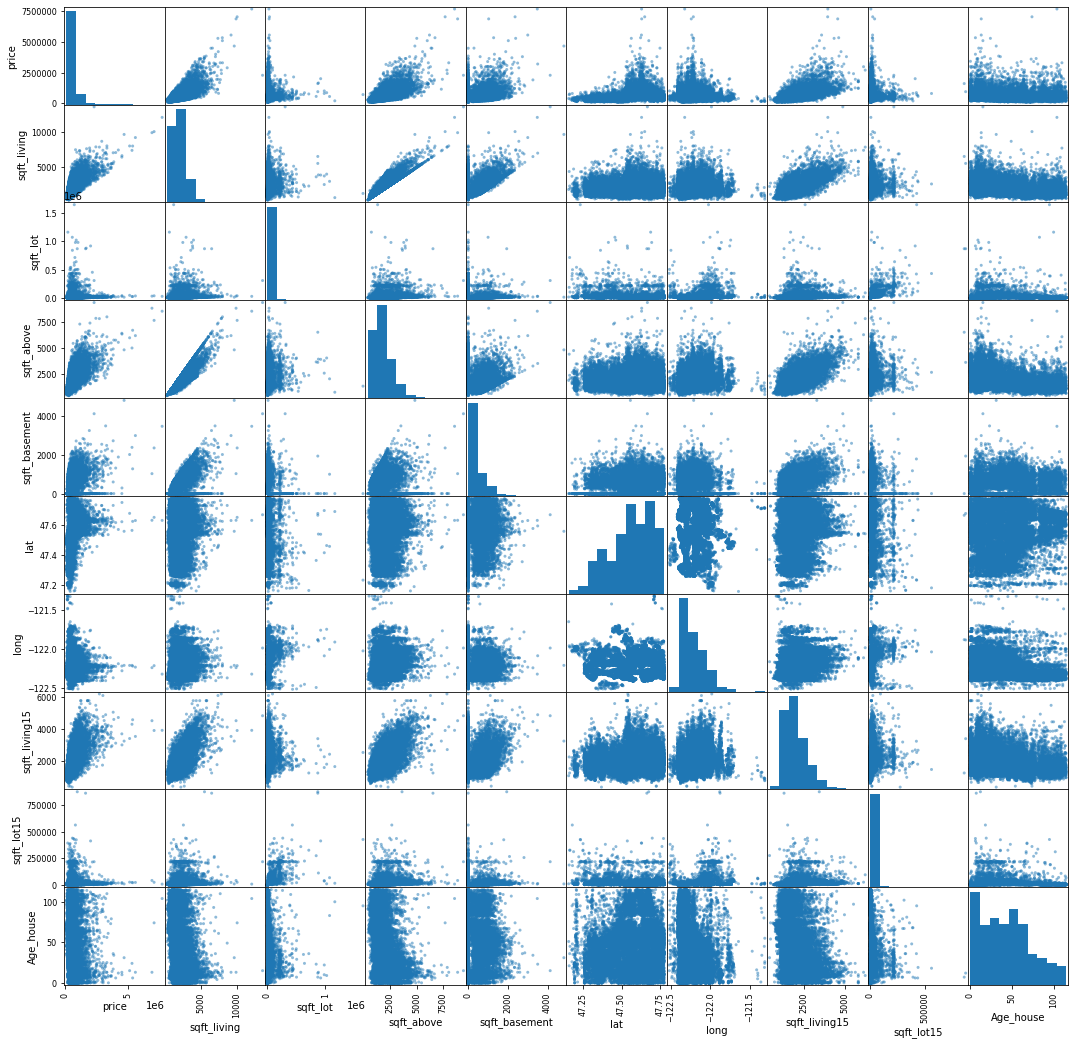

In [47]:
pd.plotting.scatter_matrix(continuous_df,figsize  = [18,18]);
plt.show();
# why doesnot this scatter plot show date, sqft_basement. Although i know both are discrete values and not continuous. 
# also the info method shows that both are objects dtype. Why is sqft_basement object dtypes??

In [48]:
discrete_features = unique_values[(unique_values <= 100)].index.to_list()
discrete_features

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated',
 'zipcode',
 'year_sold',
 'Time_since_renovation']

In [49]:
# Above we can see highly skewed distributions in price, sqft_living, sqft_abovelat, long, sqft_living15
# we should normalize these values. 

In [50]:
# from the above scatter plots, one clearly stands out - sqft_living and sqft_above.
# we will see the exact value of correlation to be sure

In [51]:
corr= kc_house_df.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print("Correlation with price showing the most important features in decreasing order:")
print(corr.price)

Correlation with price showing the most important features in decreasing order:
price                    1.000000
sqft_living              0.701917
grade                    0.667951
sqft_above               0.605368
sqft_living15            0.585241
bathrooms                0.525906
view                     0.393497
sqft_basement            0.321108
bedrooms                 0.308787
lat                      0.306692
waterfront               0.264306
floors                   0.256804
yr_renovated             0.117855
sqft_lot                 0.089876
sqft_lot15               0.082845
Time_since_renovation    0.062620
yr_built                 0.053953
condition                0.036056
long                     0.022036
year_sold                0.003727
id                      -0.016772
zipcode                 -0.053402
Age_house               -0.053896
Name: price, dtype: float64


In [52]:
kc_house_df.corr()[(abs(kc_house_df.corr()) > 0.75) & (kc_house_df.corr() < 1)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_house,Time_since_renovation
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,0.762779,0.876448,NaN,NaN,NaN,NaN,NaN,NaN,0.756402,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df=kc_house_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[df.cc > 0.75]

,cc
pairs,
"(id, id)",1.000000
"(Age_house, yr_built)",0.999873
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758
"(Time_since_renovation, yr_renovated)",0.751289


### Here we can see that there is a strong correlation between (sqft_living, sqft_above) and the correlation between sqft_living15, sqft_living is higher than 0.75. We will chose correlation of 0.75 as our cut-off for multicollinearity
### Hencewe will drop sqft_above and sqft_living15 from our predictors

In [54]:
continuous_df.drop(axis=1, columns=['sqft_above', 'sqft_living15'], inplace=True)
continuous_df.columns

## It is important to note here that although instead of dropping two features we could have move ahead with 
## dropping only sqft_living. But we wont do that, as sqft_living has the highest correlation of 0.70 with price.
## Dropping the most strongly correlated feature with price - our dependant variable is not advisable and hence
## we wont go ahead with it. 
# ALso, note that we have already dropped yr_built, and yr_renovated

<ipython-input-54-084369e9d610>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df.drop(axis=1, columns=['sqft_above', 'sqft_living15'], inplace=True)


Index(['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'lat', 'long',
       'sqft_lot15', 'Age_house'],
      dtype='object')

In [55]:
discrete_features.remove('bathrooms')
discrete_features.remove('Time_since_renovation')
discrete_features.remove('grade')

discrete_df= kc_house_df[discrete_features]
discrete_df.head()

# As the correlation of these features with other features are > 0.75

,bedrooms,floors,waterfront,view,condition,yr_renovated,zipcode,year_sold
0,3,1.0,0.0,0.0,3,0.0,98178,2014
1,3,2.0,0.0,0.0,3,1991.0,98125,2014
2,2,1.0,0.0,0.0,3,0.0,98028,2015
3,4,1.0,0.0,0.0,5,0.0,98136,2014
4,3,1.0,0.0,0.0,3,0.0,98074,2015


In [56]:
continuous_df.head()

,price,sqft_living,sqft_lot,sqft_basement,lat,long,sqft_lot15,Age_house
0,221900.0,1180,5650,0.0,47.5112,-122.257,5650,59
1,538000.0,2570,7242,400.0,47.7210,-122.319,7639,63
2,180000.0,770,10000,0.0,47.7379,-122.233,8062,82
3,604000.0,1960,5000,910.0,47.5208,-122.393,5000,49
4,510000.0,1680,8080,0.0,47.6168,-122.045,7503,28


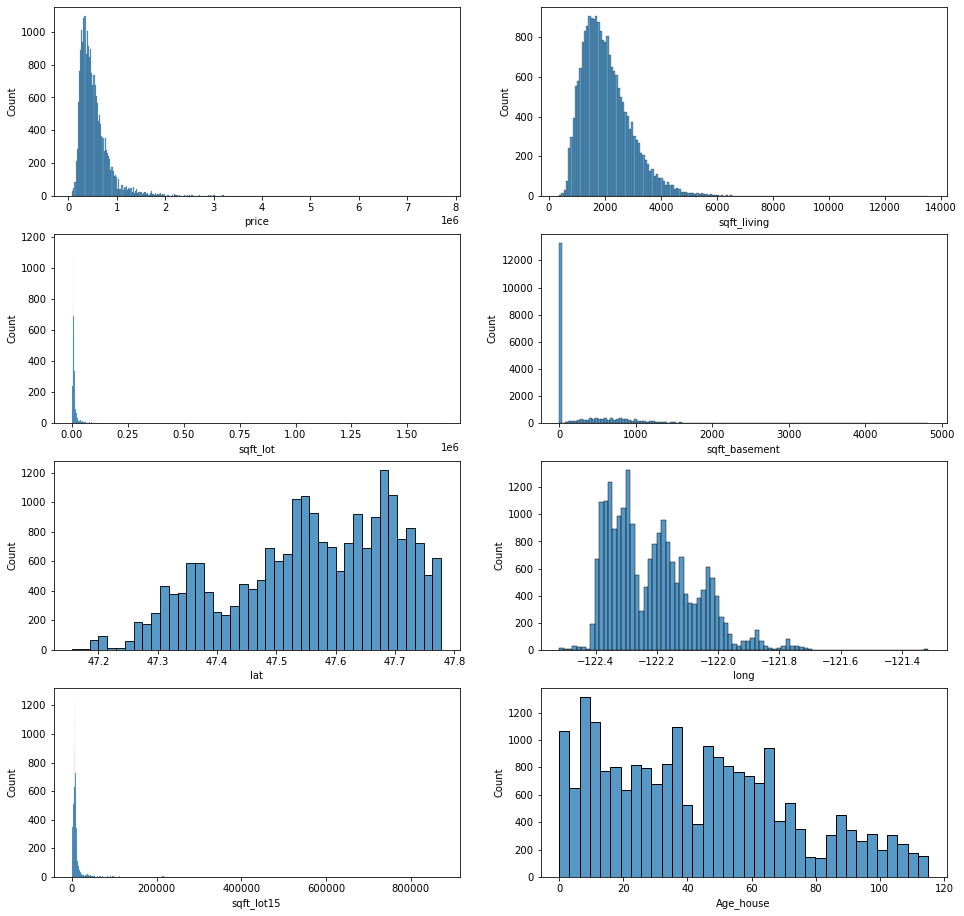

In [57]:
figs, ax = plt.subplots(4,2, figsize=(16,16))
for i in range(len(continuous_df.columns.to_list())):
    sns.histplot(continuous_df[continuous_df.columns.to_list()[i]], ax=ax[i // 2, i % 2]);

In [58]:
# How to manage yr_renovated variable with so many 0 values. We can drop the feature, but try to understand the implications.
# As 0 might mean that those house have never been renovated. 
# So can we instead, convert this column in 0 and 1 for yes and no for renovation. 
# Also we need to extract all the house that have been renovated in a separate column as the timing of renovation
# can yeild some very useful results.
# Same logic applies to sqft_basement which is highly skewed towards left hand side at 0. Here also 0 means no basement
# and hence we can split the column into two: basement and no basement and then progress with our analysis. Furthermore, 
# converting both of the above columns in categorical presents us with the option of using groupby and further hunting 
#for insights

#Another column we need to change is long column with negative value, which can be source of concern while taking logs.



In [59]:
discrete_df.loc[kc_house_df['yr_renovated'] !=0, 'Renovation'] = '1'
discrete_df.loc[kc_house_df['yr_renovated'] ==0, 'Renovation'] = '0'

# we are adding the new Renovation column to the kc_house_df and not continuous_df as these are categorical features

<ipython-input-59-87078fa392f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.loc[kc_house_df['yr_renovated'] !=0, 'Renovation'] = '1'


In [60]:
discrete_df.Renovation.value_counts()
# As you can see below we have created a new column Renovated to reflect whether the house has been renovated or not
# We shoud now also append the cat features list to reflect this

0    20853
1      744
Name: Renovation, dtype: int64

In [61]:
discrete_features = discrete_df.columns.to_list()
discrete_features

['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'yr_renovated',
 'zipcode',
 'year_sold',
 'Renovation']

In [62]:
continuous_df.sqft_basement.value_counts()


0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [63]:
# Since sqft_basement has so many 0 values, so trying to create a new information to capture what having a basement
# or lack there-ff might have on house prices. 

In [64]:
discrete_df.loc[kc_house_df['sqft_basement'] !=0, 'Basement'] = 1
discrete_df.loc[kc_house_df['sqft_basement'] ==0, 'Basement'] = 0

<ipython-input-64-fa7cbe6161ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.loc[kc_house_df['sqft_basement'] !=0, 'Basement'] = 1


In [65]:
discrete_df.Basement.value_counts()

0.0    13280
1.0     8317
Name: Basement, dtype: int64

In [66]:
# we need to drop the new feature basement as its correlation with sq_ft basement is 0.82 and sq_basment
# contains more information than this new feature. Furthermore, correlation of price, basement is 0.17, and 
# price, sq_basement is 0.32. So, clearly basement needs to be dropped from kc_house df itself. 

discrete_df.drop('Basement', axis=1, inplace=True )



<ipython-input-66-a402f2a533fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.drop('Basement', axis=1, inplace=True )


In [67]:
discrete_df.Renovation = discrete_df.Renovation.astype(float)

discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      21597 non-null  int64  
 1   floors        21597 non-null  float64
 2   waterfront    21597 non-null  float64
 3   view          21597 non-null  float64
 4   condition     21597 non-null  int64  
 5   yr_renovated  21597 non-null  float64
 6   zipcode       21597 non-null  int64  
 7   year_sold     21597 non-null  int64  
 8   Renovation    21597 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


<ipython-input-67-ba76ce001e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.Renovation = discrete_df.Renovation.astype(float)


In [68]:
discrete_features = discrete_df.columns.to_list()
discrete_features

['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'yr_renovated',
 'zipcode',
 'year_sold',
 'Renovation']

In [69]:
kc_house_cont_features = continuous_df.columns.to_list()
kc_house_cont_features

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_basement',
 'lat',
 'long',
 'sqft_lot15',
 'Age_house']

In [70]:
continuous_df.drop('long', axis=1, inplace=True) # we are currently removing long as these are negative values and later on we can add it back after taking log of remaining features
continuous_df.head(2) 

<ipython-input-70-62b6b2412f59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df.drop('long', axis=1, inplace=True) # we are currently removing long as these are negative values and later on we can add it back after taking log of remaining features


,price,sqft_living,sqft_lot,sqft_basement,lat,sqft_lot15,Age_house
0,221900.0,1180,5650,0.0,47.5112,5650,59
1,538000.0,2570,7242,400.0,47.7210,7639,63


In [71]:
# pd.plotting.scatter_matrix(continuous_df,figsize  = [18,18]);
# plt.show();

### Normalization and feature scaling

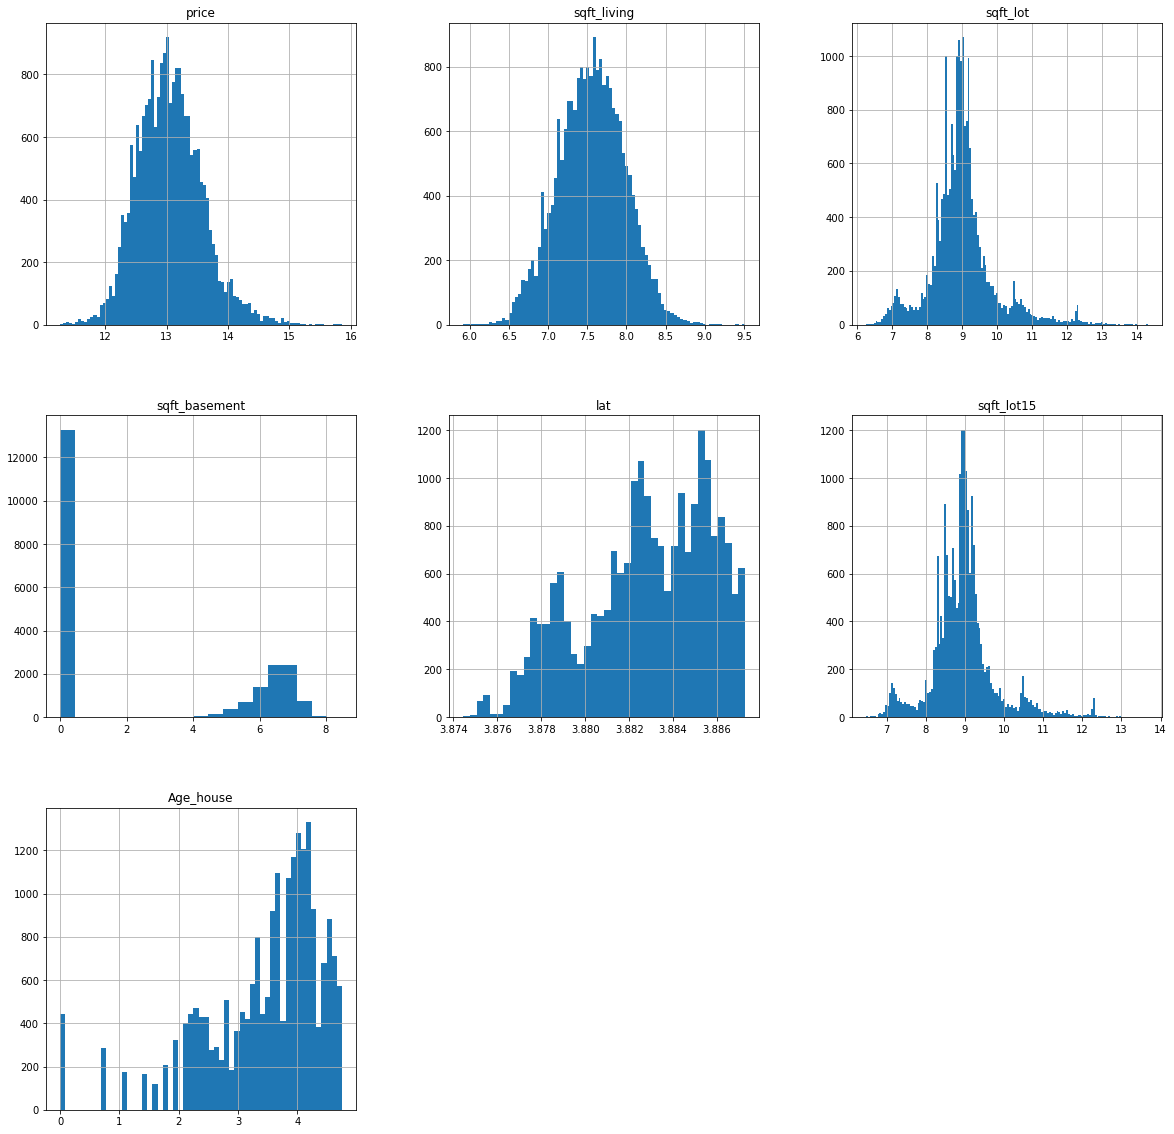

In [72]:
# Since all these features are in different scales, we will log transform them

cont_log = np.log1p(continuous_df)


cont_log.hist(figsize= [20,20], bins ='auto');
cont_log['long'] = kc_house_df['long'] # adding long back before we proceed to feature scaling

In [73]:
# Feature scaling to bring all features to the same scale and hence making all coefficients easier to compare!!!
norm_cols = list()
for c in cont_log.columns:
    norm_col = f'{c}_norm'
    cont_log[norm_col] = (cont_log[c] - cont_log[c].mean()) / cont_log[c].std()
    norm_cols.append(norm_col)
    cont_log.drop(axis=1, columns = c, inplace = True)
cont_log



,price_norm,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,lat_norm,sqft_lot15_norm,Age_house_norm,long_norm
0,-1.401997,-1.125564,-0.388490,-0.785188,-0.351390,-0.395502,0.646650,-0.305688
1,0.279938,0.709416,-0.113302,1.112322,1.160045,-0.024341,0.711197,-0.746268
2,-1.799429,-2.131418,0.244426,-0.785188,1.281512,0.041983,0.971187,-0.135141
3,0.499698,0.070561,-0.523969,1.372094,-0.282087,-0.545897,0.464305,-1.272122
4,0.178433,-0.292847,0.008081,-0.785188,0.410186,-0.046448,-0.080492,1.200812
...,...,...,...,...,...,...,...,...
21592,-0.483049,-0.513318,-2.171142,-0.785188,1.004017,-2.019795,-1.656229,-0.938134
21593,-0.282955,0.457935,-0.356962,-0.785188,-0.355000,-0.097176,-2.754982,-1.051832
21594,-0.273006,-1.468954,-1.975055,-0.785188,0.248778,-1.668985,-1.656229,-0.604146
21595,-0.282955,-0.407862,-1.343051,-0.785188,-0.183210,-2.215512,-0.962994,1.030265


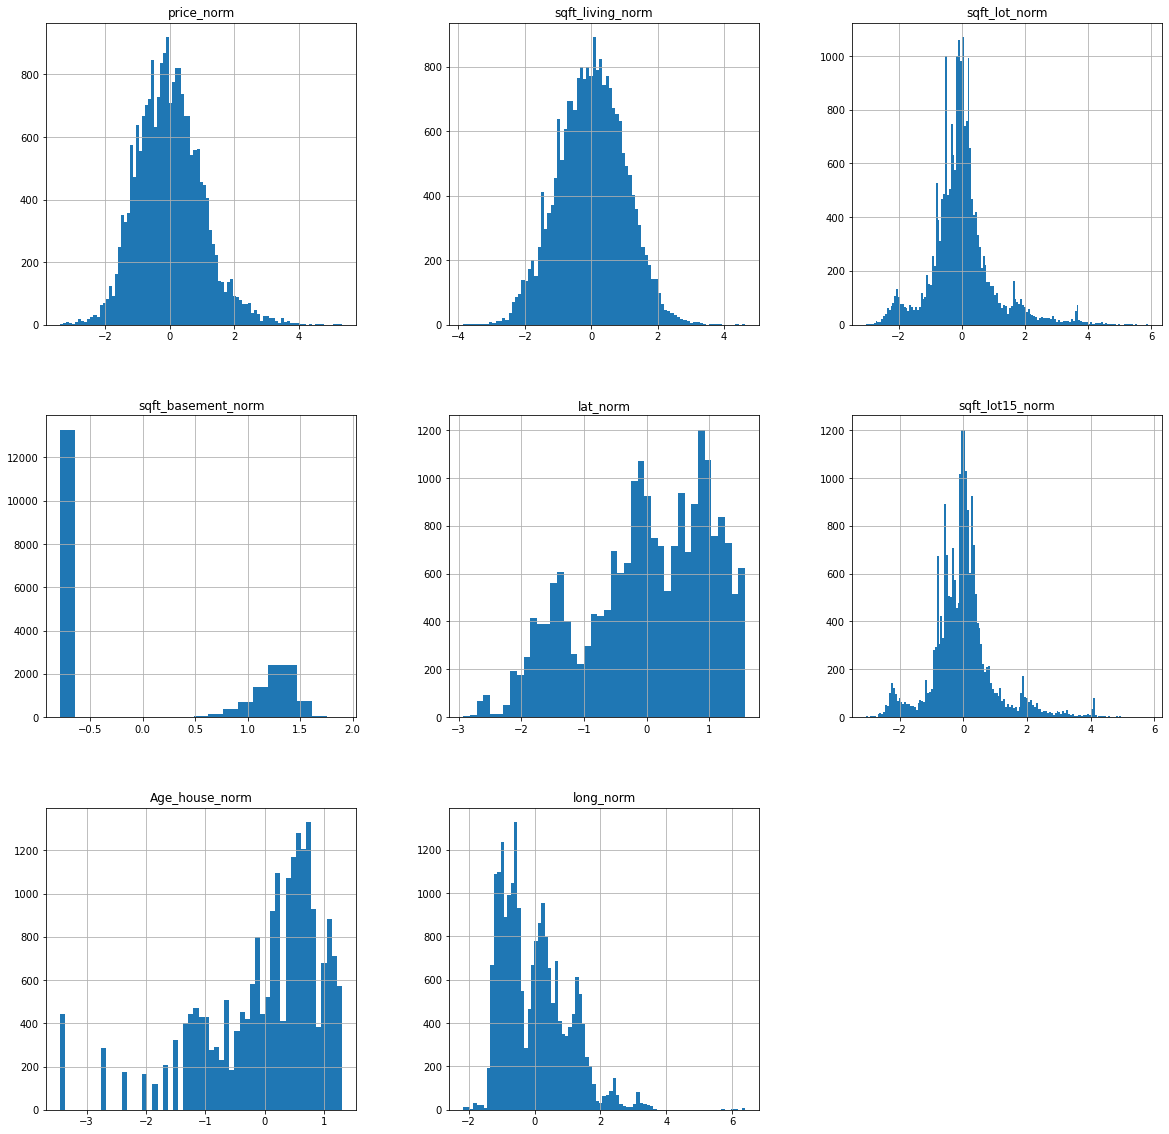

In [74]:
cont_log.hist(figsize= [20,20], bins ='auto');


In [75]:
# pd.plotting.scatter_matrix(cont_log,figsize  = [18,18]);
# plt.show();

In [76]:
discrete_df.nunique()

bedrooms        12
floors           6
waterfront       2
view             5
condition        5
yr_renovated    70
zipcode         70
year_sold        2
Renovation       2
dtype: int64

In [77]:
discrete_df.shape

(21597, 9)

In [78]:
discrete_df.corr()
discrete_df.corr()[(abs(discrete_df.corr()) > 0.50) & (discrete_df.corr() < 1)]

,bedrooms,floors,waterfront,view,condition,yr_renovated,zipcode,year_sold,Renovation
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr_renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999968
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_sold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Renovation,NaN,NaN,NaN,NaN,NaN,0.999968,NaN,NaN,NaN


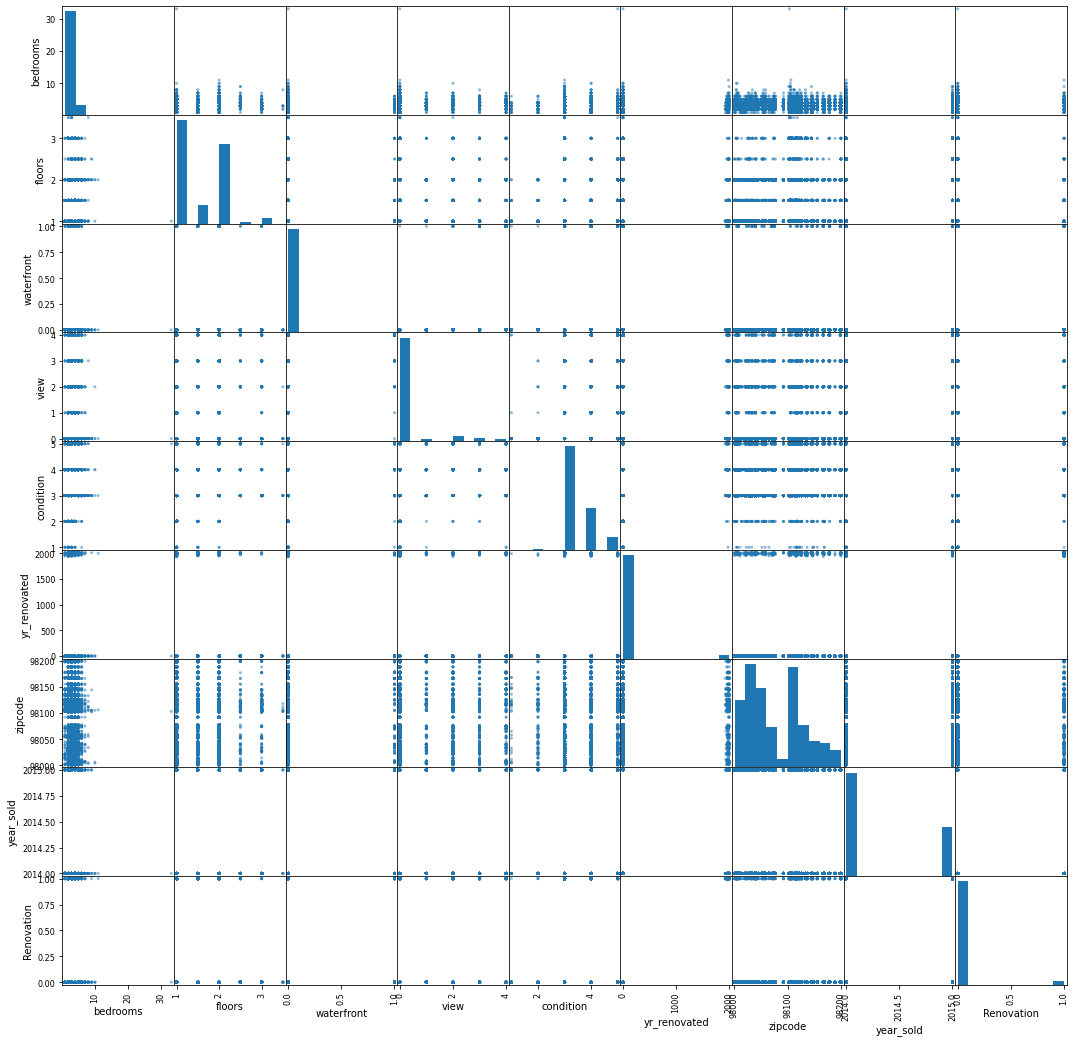

In [79]:
pd.plotting.scatter_matrix(discrete_df,figsize  = [18,18]);
plt.show();

<AxesSubplot:xlabel='zipcode', ylabel='Count'>

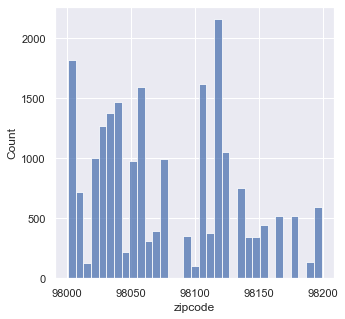

In [80]:
sns.set(rc = {'figure.figsize':(5,5)})

sns.histplot(kc_house_df['zipcode'])

# As we can see the zipcodes are distributed acorss the spectrum making it a vaible candidate for being
# considered as a categorical feature. 
# ALso, we can see that all different 70 zipcodes have atleast 50 or more datapoints, hence we will go
# ahead and create 70-1 different categories from it via one hot encoding. 

In [81]:
kc_house_df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [82]:
#of the above features, Renovation and waterfront are categorical features and 
#lets separate them from discrete variables
cat_df = pd.DataFrame()
cat_df['Renovation'] = discrete_df['Renovation']
cat_df['waterfront'] = discrete_df['waterfront']
cat_df['zipcode'] = discrete_df['zipcode']
cat_df['view'] = discrete_df['view']
# We are considering view as a categorical features as the info we had was incomplete and https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/
# provided the correct details: 'An index from 0 to 4 of how good the view of the property was'

discrete_df.drop(['waterfront', 'Renovation', 'zipcode', 'view'], axis=1, inplace=True)

<ipython-input-82-5eb6dd604589>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.drop(['waterfront', 'Renovation', 'zipcode', 'view'], axis=1, inplace=True)


In [83]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      21597 non-null  int64  
 1   floors        21597 non-null  float64
 2   condition     21597 non-null  int64  
 3   yr_renovated  21597 non-null  float64
 4   year_sold     21597 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 843.8 KB


In [255]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Renovation  21597 non-null  float64
 1   waterfront  21597 non-null  float64
 2   zipcode     21597 non-null  int64  
 3   view        21597 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 675.0 KB


In [84]:
final_df = cat_df.copy()

In [85]:
def category_ohe_multcols(multscolumns):
    df_final = final_df
    i=0
    for fields in multscolumns:
        df1=pd.get_dummies(final_df[fields],drop_first=True, prefix=fields)
        
        final_df.drop([fields], axis=1, inplace = True)
        if i==0:
            df_final=df1.copy()
            
        else:
            df_final=pd.concat([df_final, df1],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df, df_final], axis=1)
    
    return df_final

In [86]:
final_df = category_ohe_multcols(cat_df.columns)

In [87]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]
final_df.shape

(21597, 75)

In [88]:
preprocessed = pd.concat([cont_log, final_df, discrete_df], axis=1)
preprocessed

,price_norm,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,lat_norm,sqft_lot15_norm,Age_house_norm,long_norm,Renovation_1.0,waterfront_1.0,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,view_1.0,view_2.0,view_3.0,view_4.0,bedrooms,floors,condition,yr_renovated,year_sold
0,-1.401997,-1.125564,-0.388490,-0.785188,-0.351390,-0.395502,0.646650,-0.305688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1.0,3,0.0,2014
1,0.279938,0.709416,-0.113302,1.112322,1.160045,-0.024341,0.711197,-0.746268,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,3,1991.0,2014
2,-1.799429,-2.131418,0.244426,-0.785188,1.281512,0.041983,0.971187,-0.135141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,3,0.0,2015
3,0.499698,0.070561,-0.523969,1.372094,-0.282087,-0.545897,0.464305,-1.272122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1.0,5,0.0,2014
4,0.178433,-0.292847,0.008081,-0.785188,0.410186,-0.046448,-0.080492,1.200812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0,3,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.483049,-0.513318,-2.171142,-0.785188,1.004017,-2.019795,-1.656229,-0.938134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3.0,3,0.0,2014
21593,-0.282955,0.457935,-0.356962,-0.785188,-0.355000,-0.097176,-2.754982,-1.051832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2.0,3,0.0,2015
21594,-0.273006,-1.468954,-1.975055,-0.785188,0.248778,-1.668985,-1.656229,-0.604146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,3,0.0,2014
21595,-0.282955,-0.407862,-1.343051,-0.785188,-0.183210,-2.215512,-0.962994,1.030265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,3,0.0,2015


In [89]:
from pathlib import Path
filepath = Path('data/preprocessed.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
preprocessed.to_csv(filepath) #saving preprocessed dataframe as a csv file to make it easily accessible, if we want to 
# continue our analysis in other notebooks. 

In [90]:
preprocessed.shape

(21597, 88)

In [91]:
corr= preprocessed.corr()
corr.sort_values(["price_norm"], ascending = False, inplace = True)
print("Correlation with price showing the most important features in decreasing order:")
print(corr.price_norm)

Correlation with price showing the most important features in decreasing order:
price_norm          1.000000
sqft_living_norm    0.674829
lat_norm            0.449127
bedrooms            0.343360
floors              0.310630
                      ...   
zipcode_98002      -0.130129
zipcode_98042      -0.137779
Age_house_norm     -0.140216
zipcode_98168      -0.150100
zipcode_98023      -0.156488
Name: price_norm, Length: 88, dtype: float64


# <span style='background :yellow' > Baseline Model</span>


In [92]:
baseline_vars = ['sqft_living', 'lat', 'floors'] # top 3 highly correlated variable with price
y_var = ['price']
df_sm = kc_house_df[baseline_vars + y_var]
df_sm.head()

,sqft_living,lat,floors,price
0,1180,47.5112,1.0,221900.0
1,2570,47.7210,2.0,538000.0
2,770,47.7379,1.0,180000.0
3,1960,47.5208,1.0,604000.0
4,1680,47.6168,1.0,510000.0


In [93]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   lat          21597 non-null  float64
 2   floors       21597 non-null  float64
 3   price        21597 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 675.0 KB


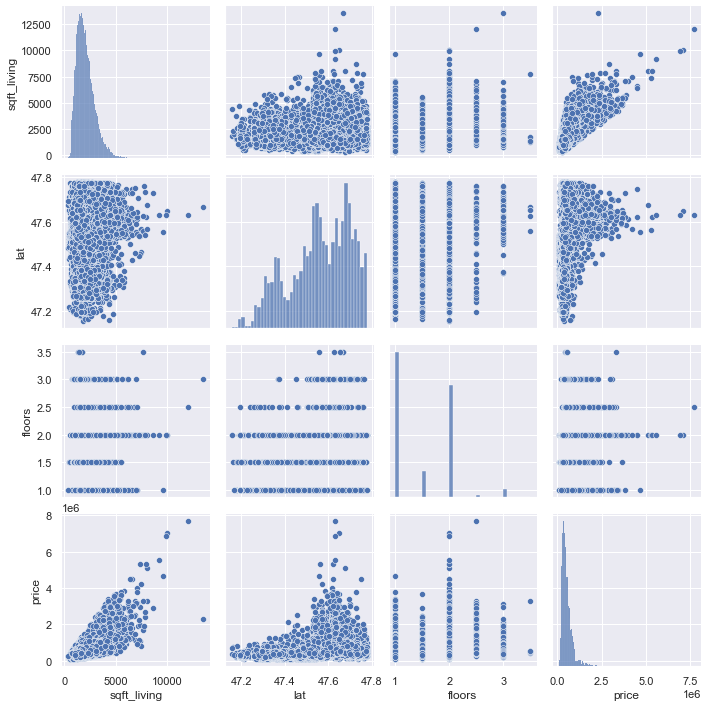

In [94]:
sns.pairplot(df_sm)

In [95]:
X = df_sm.drop(y_var, axis=1)
y = df_sm[y_var]

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

In [97]:
X_train.head()

,sqft_living,lat,floors
6405,1880,47.5664,2.0
937,2020,47.3545,1.0
19076,4720,47.4536,2.0
15201,1430,47.6844,1.0
13083,2270,47.3451,1.0


In [98]:
y_train = y_train.to_numpy()
y_train

array([[529000.],
       [253000.],
       [745000.],
       ...,
       [299800.],
       [245000.],
       [545000.]])

In [99]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 3) (5400, 3)
(16197, 1) (5400, 1)


In [100]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [101]:
linreg.fit(X_train, y_train)

LinearRegression()

In [102]:
y_train_preds = linreg.predict(X_train)
y_train_preds

array([[ 490268.34670944],
       [ 375532.96475269],
       [1185937.34544752],
       ...,
       [ 452225.93844472],
       [  17665.74301893],
       [ 853090.27874765]])

In [103]:
y_val_preds = linreg.predict(X_val)
y_val_preds

array([[ 161860.3464635 ],
       [ 480637.22020853],
       [ 403720.74968103],
       ...,
       [ 910935.32054687],
       [1435009.80614693],
       [ 120952.07441378]])

In [104]:
print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)
print(type(y_train_preds))
print(type(y_val_preds))
print(type(y_train))

2
2
2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [105]:
y_train_preds = y_train_preds.ravel()
y_val_preds = y_val_preds.ravel()
y_train = y_train.ravel()
print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)

1
1
1


In [106]:
print(y_val.ndim)
y_val = y_val.to_numpy().ravel()
print(y_val.ndim)

2
1


In [107]:
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(y_train, y_train_preds)
r2_val = r2_score(y_val, y_val_preds)

mse_train = mean_squared_error(y_train, y_train_preds)
mse_val = mean_squared_error(y_val, y_val_preds)

print(f'R2 train: {r2_train} R2 validation: {r2_val}')
print(f'MSE train: {mse_train: .3e} MSE validation: {mse_val: .3e}')

R2 train: 0.5631624799107395 R2 validation: 0.5735339250706775
MSE train:  5.862e+10 MSE validation:  5.851e+10


In [108]:
# We are defining a function to calcuate adjusted r_2 values as it is not available under sklearn.metrics

def adj_r2_score(r2, n_samples, n_regressors):
    factor = (n_samples - 1) / (n_samples - n_regressors - 1)
    return 1 - ((1-r2) * factor)


In [109]:
adj_r2_train = adj_r2_score(r2_train, len(X_train), len(X_train.columns))
adj_r2_val = adj_r2_score(r2_val, len(X_val), len(X_val.columns))
print(f'Adj. R2 train: {adj_r2_train} Adj. R2 val: {adj_r2_val}')

Adj. R2 train: 0.5630815491035841 Adj. R2 val: 0.5732968238429554


Text(0, 0.5, 'Actual House Price ($)')

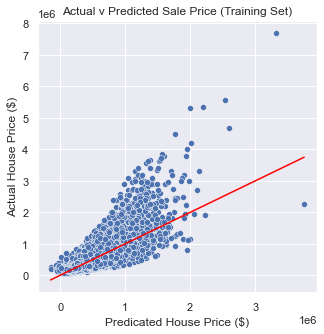

In [110]:
sns.scatterplot(x=y_train_preds, y=y_train)
sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')
plt.title('Actual v Predicted Sale Price (Training Set)')
plt.xlabel('Predicated House Price ($)')
plt.ylabel('Actual House Price ($)')

Text(0, 0.5, 'Actual House Price ($)')

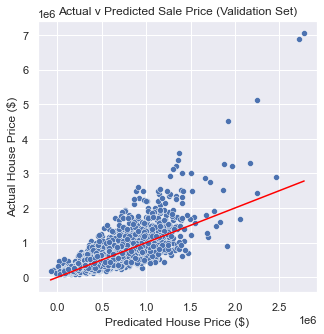

In [111]:
sns.scatterplot(x=y_val_preds, y=y_val)
sns.lineplot(x=y_val_preds, y=y_val_preds, color='red')
plt.title('Actual v Predicted Sale Price (Validation Set)')
plt.xlabel('Predicated House Price ($)')
plt.ylabel('Actual House Price ($)')

### We can see that the scatterplot for both training and set data is faning out as we move along the x-axis in positive direction!!

#### Here, we might want to normalize the dependant variable and then try fitting out our basemodel again

<AxesSubplot:ylabel='Count'>

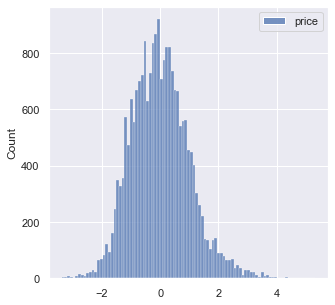

In [112]:
y = df_sm[y_var]
y= np.log1p(y)
y = (y - y.mean()) / y.std()


sns.histplot(y)


In [113]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_preds = linreg.predict(X_train)
y_val_preds = linreg.predict(X_val)

print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)
print(y_val.ndim)
print(type(y_train_preds))
print(type(y_val_preds))
print(type(y_train))
print(type(y_val))

2
2
2
2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [114]:
y_train = y_train.to_numpy()
y_train = y_train.ravel()

y_val = y_val.to_numpy()
y_val = y_val.ravel()


print(type(y_train))
print(type(y_val))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [115]:
y_train_preds = y_train_preds.ravel()
y_val_preds = y_val_preds.ravel()

print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)
print(y_val.ndim)

1
1
1
1


Text(0, 0.5, 'Log House Price ($)')

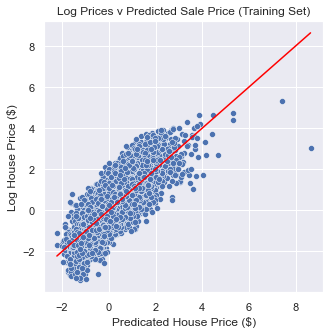

In [116]:
sns.scatterplot(x=y_train_preds, y=y_train)
sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')
plt.title('Log Prices v Predicted Sale Price (Training Set)')
plt.xlabel('Predicated House Price ($)')
plt.ylabel('Log House Price ($)')

Text(0, 0.5, 'Log House Price ($)')

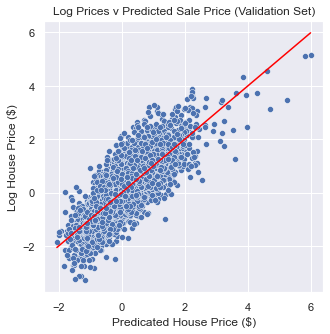

In [117]:
sns.scatterplot(x=y_val_preds, y=y_val)
sns.lineplot(x=y_val_preds, y=y_val_preds, color='red')
plt.title('Log Prices v Predicted Sale Price (Validation Set)')
plt.xlabel('Predicated House Price ($)')
plt.ylabel('Log House Price ($)')

### Here we can observe that just by taking log of the prices, fits for both the train and test have significantly improved

In [118]:
r2_train = r2_score(y_train, y_train_preds)
r2_val = r2_score(y_val, y_val_preds)

mse_train = mean_squared_error(y_train, y_train_preds)
mse_val = mean_squared_error(y_val, y_val_preds)

print(f'R2 train: {r2_train} R2 validation: {r2_val}')
print(f'MSE train: {mse_train: .3e} MSE validation: {mse_val: .3e}')

R2 train: 0.6555225868191008 R2 validation: 0.6616074592590563
MSE train:  3.456e-01 MSE validation:  3.351e-01


In [119]:
adj_r2_train = adj_r2_score(r2_train, len(X_train), len(X_train.columns))
adj_r2_val = adj_r2_score(r2_val, len(X_val), len(X_val.columns))
print(f'Adj. R2 train: {adj_r2_train} Adj. R2 val: {adj_r2_val}')

Adj. R2 train: 0.6554587671291395 Adj. R2 val: 0.6614193240436703


### <font color='blue'>Our adj_R2_val has also increased from 0.57 to 0.66. Hence, a massive increase in the adj R2 value and fit of our model </font>

In [120]:
## Cross Validation - since a single split is undependable in producing a consistent result for test data, hence we will 
## do multiple splits of our train data, although there is a trade off of some data leakage!! 

from sklearn.model_selection import cross_validate
scores = cross_validate(linreg, X, y, cv=5,
                         scoring=['r2', 'neg_mean_squared_error'],
                         return_train_score=True)
scores


{'fit_time': array([0.00598049, 0.00398946, 0.00598454, 0.0059886 , 0.00498652]),
 'score_time': array([0.00598431, 0.00299168, 0.00498652, 0.00497937, 0.004987  ]),
 'test_r2': array([0.65509888, 0.6464851 , 0.63826243, 0.65683726, 0.68326219]),
 'train_r2': array([0.65750595, 0.65952553, 0.66132603, 0.657019  , 0.64965308]),
 'test_neg_mean_squared_error': array([-0.35836798, -0.35203545, -0.34770419, -0.35731632, -0.30015221]),
 'train_neg_mean_squared_error': array([-0.33908761, -0.34068246, -0.34177517, -0.33940663, -0.35365489])}

In [121]:
#avg_score of all the 5 splits from cross validation above
avg_score = {k: np.mean(v) for k,v in scores.items()}
avg_score

{'fit_time': 0.005385923385620117,
 'score_time': 0.004785776138305664,
 'test_r2': 0.6559891737343166,
 'train_r2': 0.6570059176509846,
 'test_neg_mean_squared_error': -0.3431152288556535,
 'train_neg_mean_squared_error': -0.3429213525923676}

In [122]:
eval_list = list()
avg_score['dataset'] = 'baseline'
avg_score['n_features'] = len(X.columns)
eval_list.append(avg_score)
pd.DataFrame(eval_list)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3


### <font color='green'>Now we have a very useful dataframe to store the values of all the iterations of our models </font>

In [282]:
def get_avg_cv_score(X, y, regmodel, setname, scoring=None):
    if scoring is None:
        scoring = ['r2', 'neg_mean_squared_error']
    scores = cross_validate(regmodel, X, y, cv=5,
                         scoring=scoring,
                         return_train_score=True)
    avg_score = {k: np.mean(v) for k,v in scores.items()}
    avg_score['dataset'] = setname
    avg_score['n_features'] = len(X.columns)
    return avg_score
    

In [124]:
X = continuous_df.drop('price', axis=1)
y = y # remember y is already normalized. 

In [125]:
linreg = LinearRegression()

avg_scores = get_avg_cv_score(X, y, linreg, 'cont features pre scaling')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6


In [126]:
#We can see an almost negligible increase in r2 values for both test and train data. 
# Now we can try with normalized and scaled cont features

In [127]:
cont_log = cont_log.drop('price_norm', axis=1)

In [128]:
X= cont_log
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)


In [129]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 7) (5400, 7)
(16197, 1) (5400, 1)


In [130]:
linreg = LinearRegression()

avg_scores = get_avg_cv_score(X, y, linreg, 'cont(scaled) features')


In [131]:
eval_list.append(avg_scores)
pd.DataFrame(eval_list)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7


### <font color='green'>We can see that both r2 values have slightly decreased as well as both mean sqrd errors have increased</font>


In [132]:
X = final_df
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 75) (5400, 75)
(16197, 1) (5400, 1)


In [133]:
linreg = LinearRegression()

avg_scores = get_avg_cv_score(X, y, linreg, 'ohe cat features')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75


In [134]:
discrete_df.head(2)

,bedrooms,floors,condition,yr_renovated,year_sold
0,3,1.0,3,0.0,2014
1,3,2.0,3,1991.0,2014


In [156]:
X = discrete_df

In [159]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False, interaction_only=True)
poly.fit_transform(X)

array([[3.000000e+00, 1.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        6.042000e+03, 0.000000e+00],
       [3.000000e+00, 2.000000e+00, 3.000000e+00, ..., 5.973000e+03,
        6.042000e+03, 4.009874e+06],
       [2.000000e+00, 1.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        6.045000e+03, 0.000000e+00],
       ...,
       [2.000000e+00, 2.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        6.042000e+03, 0.000000e+00],
       [3.000000e+00, 2.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        6.045000e+03, 0.000000e+00],
       [2.000000e+00, 2.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        6.042000e+03, 0.000000e+00]])

In [136]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 5) (5400, 5)
(16197, 1) (5400, 1)


In [137]:
linreg = LinearRegression()

avg_scores = get_avg_cv_score(X, y, linreg, 'discrete features')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75
4,0.006383,0.004987,0.199790,0.204785,-0.797599,-0.795030,discrete features,5


In [138]:
X= preprocessed.drop('price_norm', axis=1)
linreg = LinearRegression()

avg_scores = get_avg_cv_score(X, y, linreg, 'cont(scaled) + discrete + cat features')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75
4,0.006383,0.004987,0.199790,0.204785,-0.797599,-0.795030,discrete features,5
5,0.051861,0.007180,0.864410,0.866867,-0.135190,-0.133103,cont(scaled) + discrete + cat features,87


### We can see significant increase in r2 train and test as well as significant reduction in mean sqrd error for both test and train data sets. Hence, we can see that adding all these features does improve the modelsubstantially!!

***
***
## <font color='purple'>Recursive feature elimination</font>



In [139]:
X = preprocessed.drop('price_norm', axis=1)

In [140]:
X.head(2)

,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,lat_norm,sqft_lot15_norm,Age_house_norm,long_norm,Renovation_1.0,waterfront_1.0,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,view_1.0,view_2.0,view_3.0,view_4.0,bedrooms,floors,condition,yr_renovated,year_sold
0,-1.125564,-0.388490,-0.785188,-0.351390,-0.395502,0.646650,-0.305688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1.0,3,0.0,2014
1,0.709416,-0.113302,1.112322,1.160045,-0.024341,0.711197,-0.746268,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,3,1991.0,2014


In [141]:
from sklearn.feature_selection import RFE

In [142]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
n_feats = 5
selector = RFE(linreg, n_features_to_select=n_feats, step=1)
selector=selector.fit(X_train, y_train)


In [143]:
selector.ranking_

array([34, 62, 74, 61, 82, 71, 68, 70, 20, 80, 64,  1,  6,  7, 15, 23, 51,
       37, 45, 47, 59, 78, 28, 19, 41, 17, 66, 65, 77,  9, 31, 56,  1,  1,
       60, 44, 14, 12, 58, 46, 55, 43, 40, 38, 27, 13,  8, 11, 63,  5, 22,
        3, 49, 25, 50,  2,  1, 18, 21, 24, 36,  4, 16, 32, 33, 35, 30, 29,
       52, 57, 39, 48, 76, 26, 67, 72, 79, 10, 53, 54, 42,  1, 75, 83, 73,
       81, 69])

In [144]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False])

In [145]:
top_cols = X.columns[selector.support_]

In [146]:
top_cols

Index(['zipcode_98004', 'zipcode_98039', 'zipcode_98040', 'zipcode_98112',
       'view_4.0'],
      dtype='object')

In [147]:
X = preprocessed[top_cols]
X.head(2)

,zipcode_98004,zipcode_98039,zipcode_98040,zipcode_98112,view_4.0
0,0,0,0,0,0
1,0,0,0,0,0


In [148]:
linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, f'{n_feats} features via RFE')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75
4,0.006383,0.004987,0.199790,0.204785,-0.797599,-0.795030,discrete features,5
5,0.051861,0.007180,0.864410,0.866867,-0.135190,-0.133103,cont(scaled) + discrete + cat features,87
6,0.005584,0.003590,0.171338,0.177186,-0.825406,-0.822591,5 features via RFE,5


In [149]:
## Interesting to see that the test_r2 and train_r2 score using top 5 features via RFE is very less as compared to 
## our base model 

In [150]:
preprocessed.columns

Index(['price_norm', 'sqft_living_norm', 'sqft_lot_norm', 'sqft_basement_norm',
       'lat_norm', 'sqft_lot15_norm', 'Age_house_norm', 'long_norm',
       'Renovation_1.0', 'waterfront_1.0', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 

In [169]:
interactive_features = ['sqft_living_norm', 'sqft_lot_norm', 'sqft_basement_norm']
X = preprocessed[interactive_features]

In [181]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False, interaction_only=True)
poly_array = poly.fit_transform(X)

In [183]:
poly_df = pd.DataFrame(poly_array, columns=['sqft_living_norm', 'sqft_lot_norm', 'sqft_basement_norm','sqft_living * sqft_lot','sqft_living * sqft_basement', 'sqft_lot * sqft_basement'])
poly_df.head()

,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,sqft_living * sqft_lot,sqft_living * sqft_basement,sqft_lot * sqft_basement
0,-1.125564,-0.388490,-0.785188,0.437270,0.883779,0.305038
1,0.709416,-0.113302,1.112322,-0.080378,0.789100,-0.126028
2,-2.131418,0.244426,-0.785188,-0.520975,1.673565,-0.191921
3,0.070561,-0.523969,1.372094,-0.036972,0.096817,-0.718935
4,-0.292847,0.008081,-0.785188,-0.002366,0.229940,-0.006345


In [192]:
### Try polynominals features for the top 5 most imp features (based on their correlation with dependant variable)

# Top 5 features = 'sqft_living_norm', 'lat_norm', 'Renovation_1.0', 'waterfront_1.0', 'view' 

polynomial = pd.DataFrame()

polynomial["sqft_living_norm-s2"] = preprocessed["sqft_living_norm"] ** 2
polynomial["sqft_living_norm-s3"] = preprocessed["sqft_living_norm"] ** 3
polynomial["sqft_living_norm-Sq"] = np.sqrt(preprocessed["sqft_living_norm"])

polynomial["lat_norm-s2"] = preprocessed["lat_norm"] ** 2
polynomial["lat_norm-s3"] = preprocessed["lat_norm"] ** 3
polynomial["lat_norm-Sq"] = np.sqrt(preprocessed["lat_norm"])

polynomial["Renovation_1.0-s2"] = preprocessed["Renovation_1.0"] ** 2
# polynomial["Renovation_1.0-s3"] = preprocessed["Renovation_1.0"] ** 3 no need for cube as these are binary values
# polynomial["Renovation_1.0-Sq"] = np.sqrt(preprocessed["Renovation_1.0"]) no need for cube as these are binary values

polynomial["waterfront_1.0-s2"] = preprocessed["waterfront_1.0"] ** 2
# polynomial["waterfront_1.0-s3"] = preprocessed["waterfront_1.0"] ** 3 no need for cube as these are binary values
# polynomial["waterfront_1.0-Sq"] = np.sqrt(preprocessed["waterfront_1.0"]) no need for cube as these are binary values



C:\Users\udhai\anaconda3\envs\learn-env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\udhai\anaconda3\envs\learn-env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# polynomial.head(3)

In [ ]:
# Since the polynomial df have infinite or nan values lets inspect that first
# polynomial.describe()

In [ ]:
# The only features that seems to create nuisance for us is sqft_living_norm-Sq as it has nan values

# polynomial.isnull().sum()

In [193]:
polynomial.drop(['sqft_living_norm-Sq','lat_norm-Sq'], axis=1, inplace=True)
polynomial.head(1)

,sqft_living_norm-s2,sqft_living_norm-s3,lat_norm-s2,lat_norm-s3,Renovation_1.0-s2,waterfront_1.0-s2
0,1.266893,-1.425969,0.123475,-0.043388,0,0


In [195]:
# polynomials_norm_cols = list()
# for c in polynomial.columns:
#     polynomials_norm_col= f'{c}_norm'
#     polynomial[polynomials_norm_col] = (polynomial[c] - polynomial[c].mean()) / polynomial[c].std()
#     polynomials_norm_cols.append(polynomials_norm_col)
#     polynomial.drop(axis=1, columns = c, inplace = True)
# polynomial
# Polynomial features shouldnot be normalized here....as they are created from normalized features anyways

,sqft_living_norm-s2_norm,sqft_living_norm-s3_norm,lat_norm-s2_norm,lat_norm-s3_norm,Renovation_1.0-s2_norm,waterfront_1.0-s2_norm
0,0.192632,-0.366304,-0.759981,0.160508,-0.188883,-0.082498
1,-0.358420,0.100442,0.299796,0.736984,5.294046,-0.082498
2,2.556725,-2.527775,0.556946,0.932267,-0.188883,-0.082498
3,-0.718003,0.007073,-0.798048,0.168032,-0.188883,-0.082498
4,-0.659710,0.000406,-0.721155,0.200894,-0.188883,-0.082498
...,...,...,...,...,...,...
21592,-0.531450,-0.028426,0.007020,0.539739,-0.188883,-0.082498
21593,-0.570267,0.032119,-0.757770,0.160023,-0.188883,-0.082498
21594,0.835554,-0.822783,-0.813380,0.181629,-0.188883,-0.082498
21595,-0.601552,-0.010781,-0.837940,0.173888,-0.188883,-0.082498


In [196]:
# Combining these polynomials with our preprocessed df

X = preprocessed.drop('price_norm', axis=1) 
X= pd.concat([X, polynomial], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'preprocessed + polynomial ')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)


(16197, 93) (5400, 93)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75
4,0.006383,0.004987,0.199790,0.204785,-0.797599,-0.795030,discrete features,5
5,0.051861,0.007180,0.864410,0.866867,-0.135190,-0.133103,cont(scaled) + discrete + cat features,87
6,0.005584,0.003590,0.171338,0.177186,-0.825406,-0.822591,5 features via RFE,5
7,0.006782,0.004787,0.489812,0.491837,-0.508787,-0.508054,6 polynomial features,6
8,0.004388,0.003591,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3
9,0.005585,0.003989,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3


In [197]:
# Now we can proceed to check the significance of these polynomial features to our model 

X=poly_df.drop(['sqft_living_norm', 'sqft_lot_norm', 'sqft_basement_norm'], axis=1)
Z = preprocessed.drop('price_norm', axis=1) 
X= pd.concat([X, Z, polynomial], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'preprocessed + poly+ interactive')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)



(16197, 96) (5400, 96)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75
4,0.006383,0.004987,0.199790,0.204785,-0.797599,-0.795030,discrete features,5
5,0.051861,0.007180,0.864410,0.866867,-0.135190,-0.133103,cont(scaled) + discrete + cat features,87
6,0.005584,0.003590,0.171338,0.177186,-0.825406,-0.822591,5 features via RFE,5
7,0.006782,0.004787,0.489812,0.491837,-0.508787,-0.508054,6 polynomial features,6
8,0.004388,0.003591,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3
9,0.005585,0.003989,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3


### As we can see with the addition of polynomial features to our preprocessed features we have significant  increase in the values of r2 for both train and test data as well as the minimum mean squared error. Hence, going forward we will consider these features along with preprocessed features while apply RFE. 

In [234]:
## During data clearning and while preprocessing the data, we did drop quite a few features mainly due to multicollinearity

dropped_features= pd.DataFrame()

dropped_features['sqft_above'] = np.log1p(kc_house_df.sqft_above)
dropped_features['sqft_living15'] = np.log1p(kc_house_df.sqft_living15)
dropped_features['yr_built'] = kc_house_df.yr_built
dropped_features['date'] = kc_house_df.year_sold
dropped_features['bathrooms'] = kc_house_df.bathrooms
dropped_features['Time_since_renovation'] = kc_house_df.Time_since_renovation
dropped_features['grade'] = kc_house_df.grade

#making sure that the dropped features are normalized and scalled as well. 

norm_cols = list()
for c in dropped_features.columns:
    norm_col = f'{c}_norm'
    dropped_features[norm_col] = (dropped_features[c] - dropped_features[c].mean()) / dropped_features[c].std()
    norm_cols.append(norm_col)
    dropped_features.drop(axis=1, columns = c, inplace = True)
dropped_features




,sqft_above_norm,sqft_living15_norm,yr_built_norm,date_norm,bathrooms_norm,Time_since_renovation_norm,grade_norm
0,-0.753624,-1.035420,-0.544665,-0.690651,-1.451039,-0.142892,-0.560787
1,0.672625,-0.326861,-0.680835,-0.690651,0.174482,5.055105,-0.560787
2,-1.752585,1.126525,-1.293596,1.447842,-1.451039,-0.142892,-1.413157
3,-1.026820,-0.990188,-0.204243,-0.690651,1.149794,-0.142892,-0.560787
4,0.073385,-0.134305,0.544688,1.447842,-0.150622,-0.142892,0.291583
...,...,...,...,...,...,...,...
21592,-0.145574,-0.630564,1.293618,-0.690651,0.499586,-0.142892,0.291583
21593,0.819022,-0.083829,1.463829,1.447842,0.499586,-0.142892,0.291583
21594,-1.094661,-1.868420,1.293618,-0.690651,-1.776143,-0.142892,-0.560787
21595,-0.040842,-0.879952,1.123406,1.447842,0.499586,-0.142892,0.291583


In [235]:
X=dropped_features
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'norm_scaled 7 dropped feat')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

(16197, 7) (5400, 7)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75
4,0.006383,0.004987,0.199790,0.204785,-0.797599,-0.795030,discrete features,5
5,0.051861,0.007180,0.864410,0.866867,-0.135190,-0.133103,cont(scaled) + discrete + cat features,87
6,0.005584,0.003590,0.171338,0.177186,-0.825406,-0.822591,5 features via RFE,5
7,0.006782,0.004787,0.489812,0.491837,-0.508787,-0.508054,6 polynomial features,6
8,0.004388,0.003591,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3
9,0.005585,0.003989,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3


In [236]:
X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'preprocessed + polynomials +7 dropped feat')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

(16197, 100) (5400, 100)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75
4,0.006383,0.004987,0.199790,0.204785,-0.797599,-0.795030,discrete features,5
5,0.051861,0.007180,0.864410,0.866867,-0.135190,-0.133103,cont(scaled) + discrete + cat features,87
6,0.005584,0.003590,0.171338,0.177186,-0.825406,-0.822591,5 features via RFE,5
7,0.006782,0.004787,0.489812,0.491837,-0.508787,-0.508054,6 polynomial features,6
8,0.004388,0.003591,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3
9,0.005585,0.003989,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3


### Interestingly, our model fit was improved by around 2.5% by adding dropped features. This makes sense for our business case, as our number one priority is to predict the house prices and not infer the reasons causing those, although that is also helpful; we recognize the trade-off but chose to make the dropped features as part of our model.

***
## Lets try to find the top 10 features useful for predicting house prices

In [237]:

X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
n_feats = 10
selector = RFE(linreg, n_features_to_select=n_feats, step=1)
selector=selector.fit(X_train, y_train)



In [238]:
selector.ranking_


array([18, 45, 88, 25, 86, 46, 70,  1,  1, 74, 52,  1,  6,  8, 38, 41, 22,
       61, 26, 23, 73, 79, 72, 33, 89, 39, 68, 84, 43,  9, 56, 32,  1,  1,
       62, 55, 44, 58, 37, 82, 83, 57, 67, 24, 60, 59, 54, 71, 65,  7, 13,
        4, 69, 16, 63,  3,  1, 12, 14, 15, 51,  5, 11, 49, 42, 80, 17, 36,
       64, 75, 90, 40, 19, 34, 20, 35, 66, 10, 29, 31, 21,  2, 85, 76, 50,
       81,  1, 87, 91, 28, 27,  1,  1, 53, 48, 47,  1, 77, 78, 30])

In [239]:
selector.support_



array([False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False])

In [240]:
top_cols = X.columns[selector.support_]
top_cols

Index(['Renovation_1.0', 'waterfront_1.0', 'zipcode_98004', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98112', 'year_sold', 'Renovation_1.0-s2_norm',
       'waterfront_1.0-s2_norm', 'date_norm'],
      dtype='object')

In [241]:
top_cols.shape

(10,)

In [242]:
type(top_cols)

pandas.core.indexes.base.Index

In [243]:
type(top_cols.to_numpy())

numpy.ndarray

In [244]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[[-7.27027018e+11  2.74870442e+13  1.83514748e+00  2.75736132e+00
   1.62107720e+00  1.50880688e+00  6.87072663e+11  1.32598288e+11
  -2.25239662e+12 -3.21288212e+11]]
[-1.38414701e+15]


In [245]:
estimators.coef_ = estimators.coef_.reshape(-1,1)

In [246]:
top_10_features = pd.DataFrame()
top_10_features['top_10_features'] = top_cols
top_10_features['coeffecients'] = estimators.coef_[:]
top_10_features['index'] = range(1,11)
top_10_features.set_index('index', inplace = True)
top_10_features

,top_10_features,coeffecients
index,,
1,Renovation_1.0,-7.270270e+11
2,waterfront_1.0,2.748704e+13
3,zipcode_98004,1.835147e+00
4,zipcode_98039,2.757361e+00
5,zipcode_98040,1.621077e+00
6,zipcode_98112,1.508807e+00
7,year_sold,6.870727e+11
8,Renovation_1.0-s2_norm,1.325983e+11
9,waterfront_1.0-s2_norm,-2.252397e+12


## Evaluating the top 10 features by Partial Dependance Plot

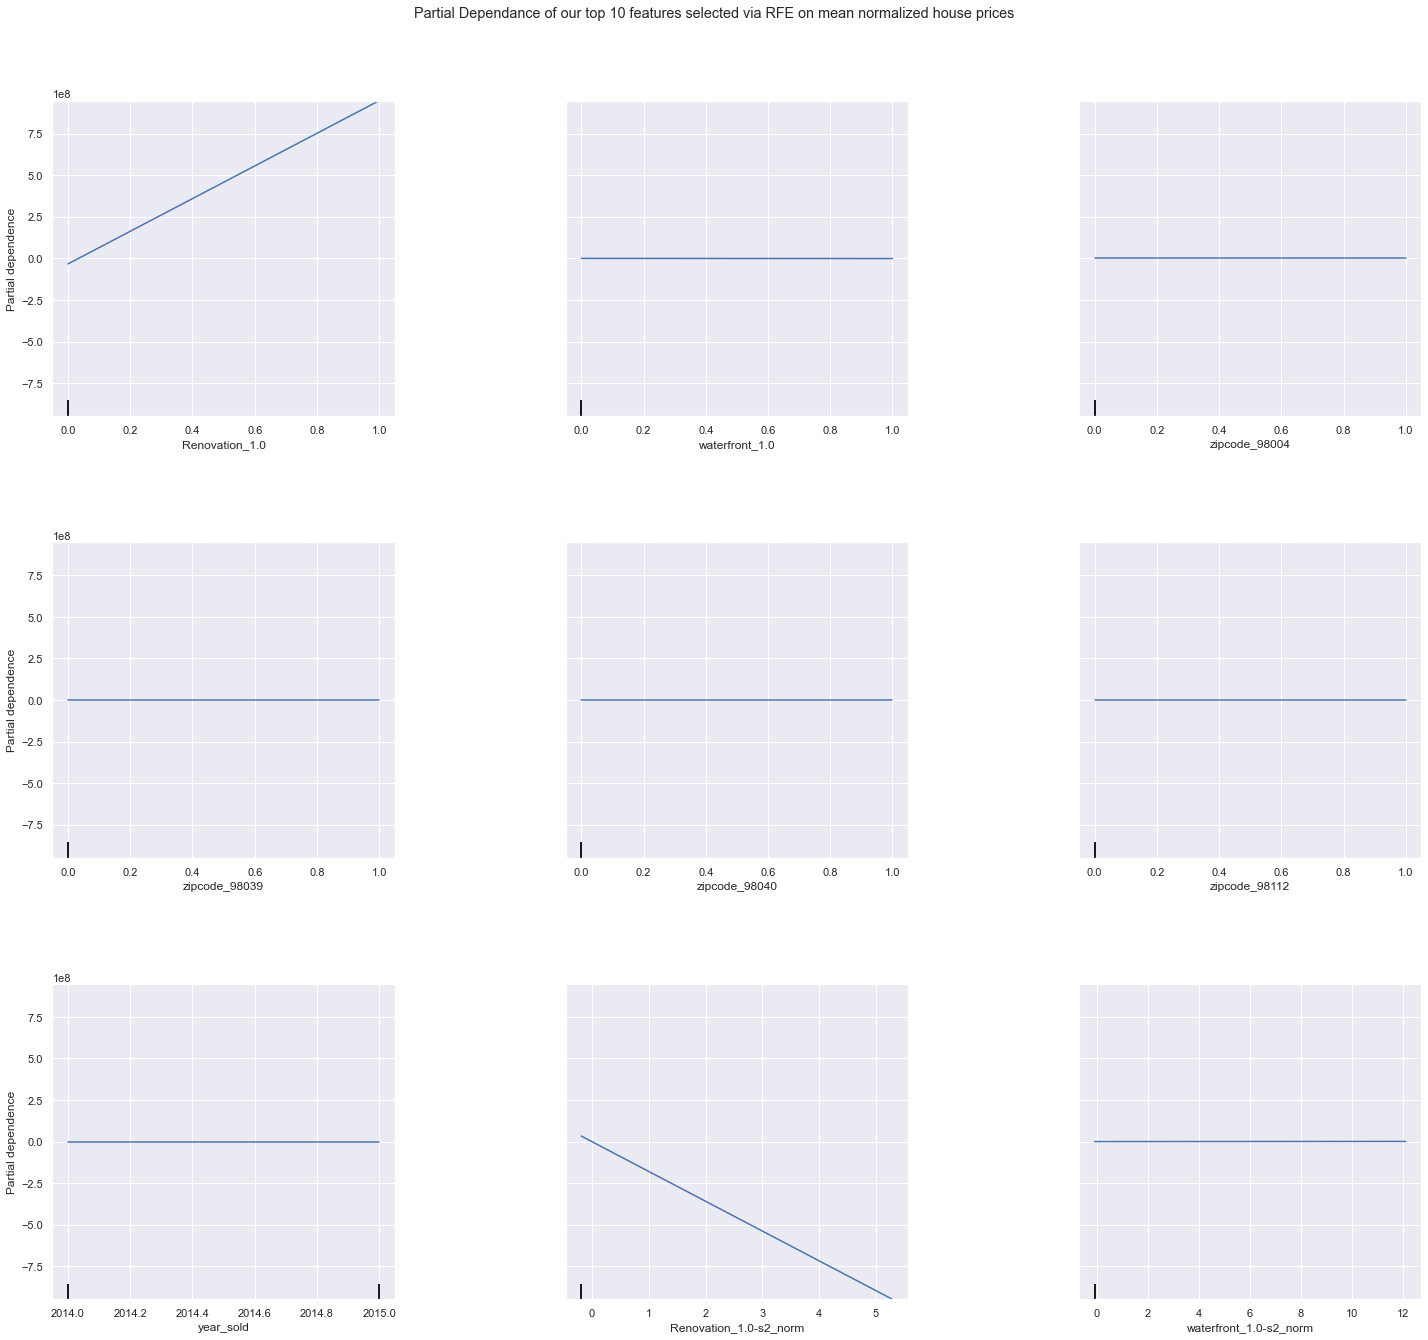

In [247]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

# We already have a trained dataset from above with only predictors

X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial], axis=1)


# we are not including dropped features in this df as that party defeats the purpose of conducting partial dependance 
# plot analysis. Because as you remember our collection of dropped features are those which are already highly correlated
# with some of the other features we already have in our df. So, in order to isolate a feature for partial dependance 
# purposes, we have to make sure the dropped features which might have a relationship with one of our features needs
# to dropped from this analysis.


y = df_sm[y_var]
y= np.log1p(y)
y = (y - y.mean()) / y.std()
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)


linreg = LinearRegression()
linreg.fit(X_train, y_train)

features = ['Renovation_1.0', 'waterfront_1.0', 'zipcode_98004', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98112', 'year_sold', 'Renovation_1.0-s2_norm',
       'waterfront_1.0-s2_norm']

plot_partial_dependence(linreg, X_train, features, n_jobs =3, grid_resolution=20)
fig = plt.gcf()
fig.set_size_inches(20,20)
fig.suptitle('Partial Dependance of our top 10 features selected via RFE on mean normalized house prices')
fig.subplots_adjust(wspace=0.5, hspace=0.4)
fig.tight_layout(rect=[0,0.05,1,0.95])



### Why most of the partial dependance plots are straight line......if they do not have relationship with house prices....they shouldnt be in the top 10 features!!

In [ ]:
!!!!

***

# <span style='background :yellow' > Final Regression Result of our Model </span>


***

### You will notice that the coefficient for these features will be differernt if we look at the array of 100 features below. This is because we are currently only looking at top 10 features

### The reason I am representing top 10 features is too provide context on the degree to which our house predication is dependant on waterfront, renovation and zipcode.  







### Since all these 10 features have been scaled and roughly belong to the same scale and hence their coefficients are indicative of their relationships with our dependant variable price_norm.

### We can also see a lot of these features relates to waterfront, renovation and zipcode. Hence, we can say that these 3 have strong predictive relationship with house prices. Since coefficient for both Renovation_1.0_s2_norm and waterfront_1.0 are positive.

### Hence having a renovation will likely increase house price.

### While, waterfront is not something an individual customer can influence but if someone is prospecting to buy a house with a waterfront; then they should know that houses with a waterfront comes at a premium. Corrollory is that, if someone is selling  a house, they should be expecting a premium for their house. Premium to what extent, can be answered by our model by fitting that house in our linreg model. 

***


In [248]:
kc_house_df['Renovation_1.0'] = preprocessed['Renovation_1.0']
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
kc_house_df['price_sqft_living'] = (kc_house_df.price / kc_house_df.sqft_living).astype(int)
kc_house_df['price_sqft_lot'] = kc_house_df.price / kc_house_df.sqft_lot
kc_house_df['price_sqft_above'] = kc_house_df.price / kc_house_df.sqft_above
kc_house_df['price_sqft_living15'] = kc_house_df.price / kc_house_df.sqft_living15
kc_house_df['price_sqft_lot15'] = kc_house_df.price / kc_house_df.sqft_lot15
kc_house_df.groupby(['zipcode', 'Renovation_1.0']).price_sqft_living.agg(['max', 'min', 'count', 'median', 'mean'])

max  min  count  median        mean
zipcode Renovation_1.0                                     
98001   0               395   88    357   147.0  150.593838
        1               218  132      4   174.5  174.750000
98002   0               247   87    194   147.0  151.067010
        1               158  112      5   138.0  136.200000
98003   0               258   88    278   154.0  156.636691
...                     ...  ...    ...     ...         ...
98188   1               236  114      3   189.0  179.666667
98198   0               791   88    271   170.0  175.767528
        1               394  111      9   236.0  242.888889
98199   0               750  211    294   352.5  373.676871
        1               701  238     23   413.0  408.173913

[139 rows x 5 columns]

In [249]:
gp3 = kc_house_df.groupby(['zipcode', 'Renovation_1.0']).price_sqft_living.agg(['max', 'min', 'count', 'median', 'mean']).reset_index()
gp3.columns

Index(['zipcode', 'Renovation_1.0', 'max', 'min', 'count', 'median', 'mean'], dtype='object')

In [250]:
gp3 =gp3.drop([34]) # dropping this row as this zipcode does not have any renovated house 
gp3

gp5 = gp3[gp3['Renovation_1.0'] == 1]
gp4 = gp3[gp3['Renovation_1.0'] == 0] # for all rows of gp4 and gp5 we have matched our rows and zipcode which 
# was essential for the comparision below 

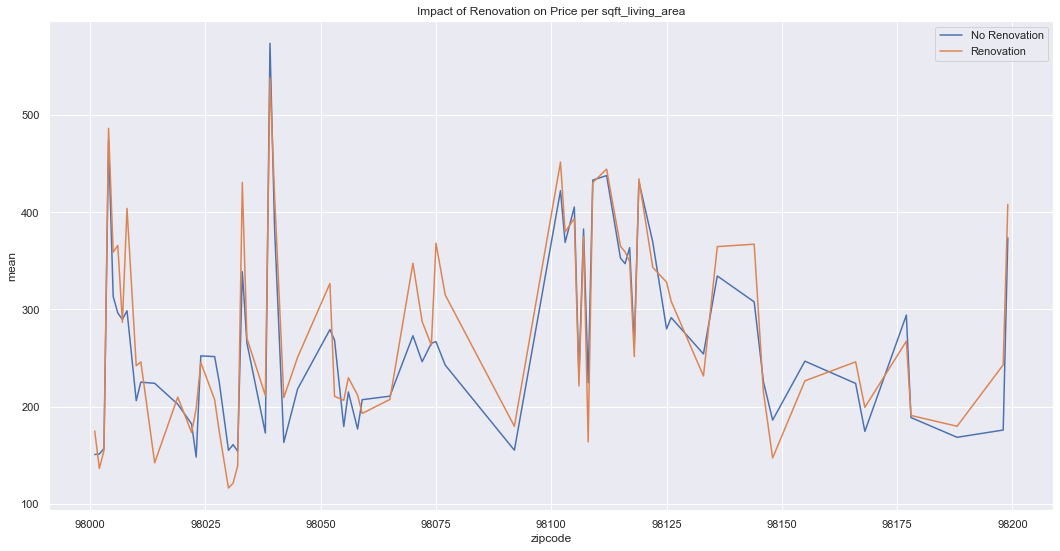

In [251]:
sns.set(rc = {'figure.figsize':(18,9)})
sns.lineplot(x=gp4['zipcode'], y=gp4['mean'], label='No Renovation');
sns.lineplot(x=gp5['zipcode'], y=gp5['mean'], label = 'Renovation');
plt.title('Impact of Renovation on Price per sqft_living_area');

#### The result from our regression analysis is backed by the above figure where the price_per_sq_ft of houses with renovation in the same zipcode is almost always higher than the houses without renovation. Although this is not always the case, as there are other features also influencing the prices as well as there might be confounding features which are bot in our dataset.

In [252]:
# If we take jsut these 10 features to build our model, how will we do?

X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)
X = X[top_cols]

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

linreg = LinearRegression()
avg_scores = get_avg_cv_score(X, y, linreg, 'top10(of 100) feats via RFE ')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

(16197, 10) (5400, 10)
(16197, 1) (5400, 1)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75
4,0.006383,0.004987,0.199790,0.204785,-0.797599,-0.795030,discrete features,5
5,0.051861,0.007180,0.864410,0.866867,-0.135190,-0.133103,cont(scaled) + discrete + cat features,87
6,0.005584,0.003590,0.171338,0.177186,-0.825406,-0.822591,5 features via RFE,5
7,0.006782,0.004787,0.489812,0.491837,-0.508787,-0.508054,6 polynomial features,6
8,0.004388,0.003591,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3
9,0.005585,0.003989,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3


In [ ]:
### Surprisingly, the fit of our top 10 features are extremely bad. Even much worse than our basemodel. 

In [253]:
X.shape

(21597, 10)

In [254]:
X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)


train_r2_scores = list()
train_adj_r2_scores= list()
train_mse_values = list()

test_r2_scores = list()
test_adj_r2_scores = list()
test_mse_values = list()

n_feat_values = list()

for n_feats in range(3, len(X.columns)):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    selector=RFE(linreg, n_features_to_select=n_feats, step=1)
    selector=selector.fit(X_train, y_train)

    top_cols = X.columns[selector.support_]

    X_sm = X[top_cols]
    X_train, X_val, y_train, y_val = train_test_split(X_sm, y, test_size=0.25, random_state=42)

    sm_linreg = LinearRegression()
    sm_linreg.fit(X_train, y_train)

    y_train_preds = sm_linreg.predict(X_train)
    y_val_preds = sm_linreg.predict(X_val)

    train_r2_scores.append(r2_score(y_train, y_train_preds))
    train_mse_values.append(mean_squared_error(y_train, y_train_preds))
    train_adj_r2_scores.append(adj_r2_score(train_r2_scores[-1], len(X_train), len(X_train.columns)))

    test_r2_scores.append(r2_score(y_val, y_val_preds))
    test_mse_values.append(mean_squared_error(y_val, y_val_preds))
    test_adj_r2_scores.append(adj_r2_score(test_r2_scores[-1], len(X_val), len(X_val.columns)))


    n_feat_values.append(n_feats)
        


    





Text(0.5, 1.0, 'train_R2_scores')

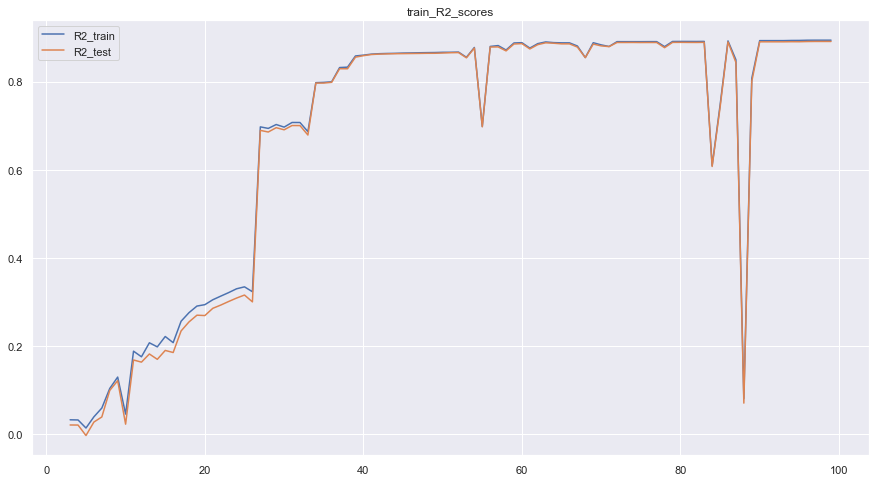

In [256]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=n_feat_values, y=train_r2_scores, label= "R2_train")
sns.lineplot(x=n_feat_values, y=test_r2_scores, label= "R2_test")
plt.title('train_R2_scores')

Text(0.5, 1.0, 'Adj R2 Values')

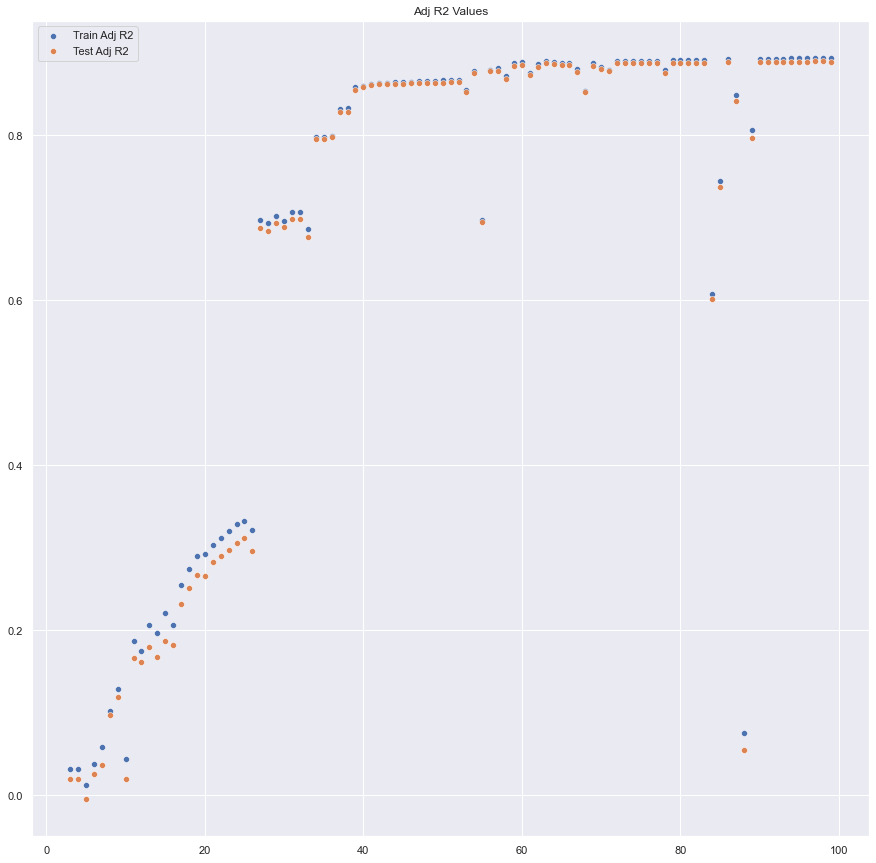

In [257]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.scatterplot(x=n_feat_values, y=train_adj_r2_scores, label='Train Adj R2')
sns.scatterplot(x=n_feat_values, y=test_adj_r2_scores, label='Test Adj R2')
plt.title('Adj R2 Values')


In [273]:
(train_adj_r2_scores[52])

0.6972333970432396

In [280]:
X.columns.to_list()[52]

'zipcode_98106'

Text(0.5, 1.0, 'MSE Values')

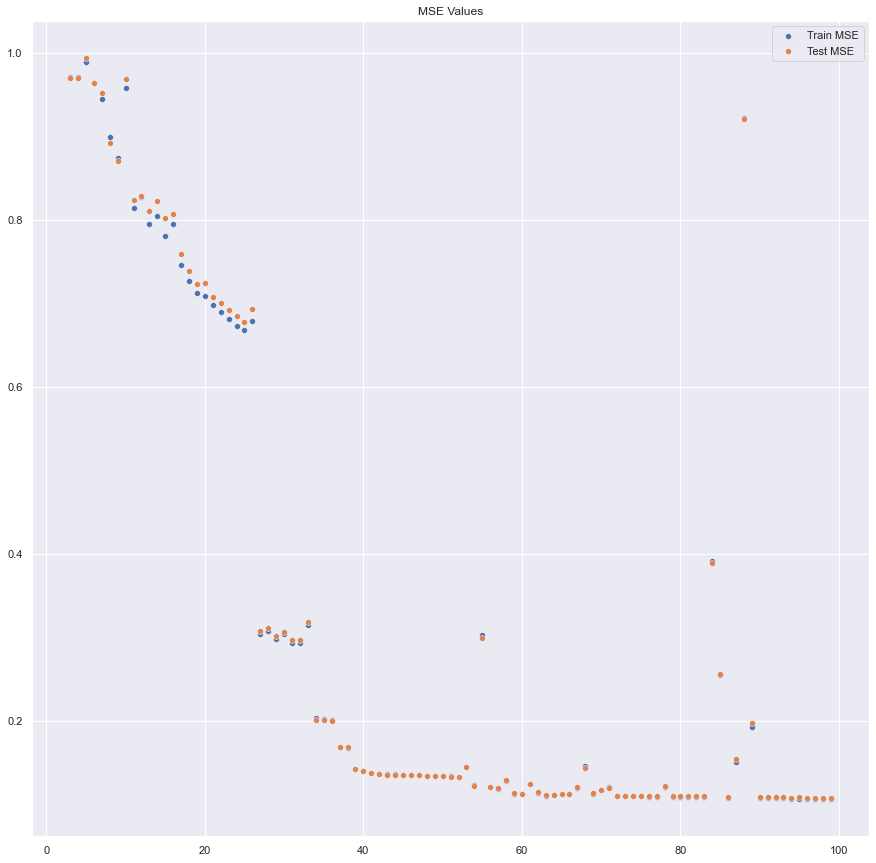

In [281]:
sns.scatterplot(x=n_feat_values, y=train_mse_values, label='Train MSE')
sns.scatterplot(x=n_feat_values, y=test_mse_values, label='Test MSE')
plt.title('MSE Values')

## Finally, predictions

In [283]:
len(X.columns)

100

In [284]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)

LinearRegression()

In [285]:
y_train_preds = linreg.predict(X_train)
y_val_preds = linreg.predict(X_val)

In [286]:
print(y_train_preds.ndim)
print(y_train.ndim)
print(y_val.ndim)
print(y_val_preds.ndim)
print(type(y_train_preds))
print(type(y_val_preds))
print(type(y_train))
print(type(y_val))

2
2
2
2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [287]:
y_train = y_train.to_numpy()
y_train = y_train.ravel()

y_val = y_val.to_numpy()
y_val = y_val.ravel()


print(type(y_train))
print(type(y_val))

y_train_preds = y_train_preds.ravel()
y_val_preds = y_val_preds.ravel()

print(type(y_train_preds))
print(type(y_val_preds))

print(y_train_preds.ndim)
print(y_val_preds.ndim)
print(y_train.ndim)
print(y_val.ndim)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1
1
1
1


Text(0, 0.5, 'Actual house prices($)')

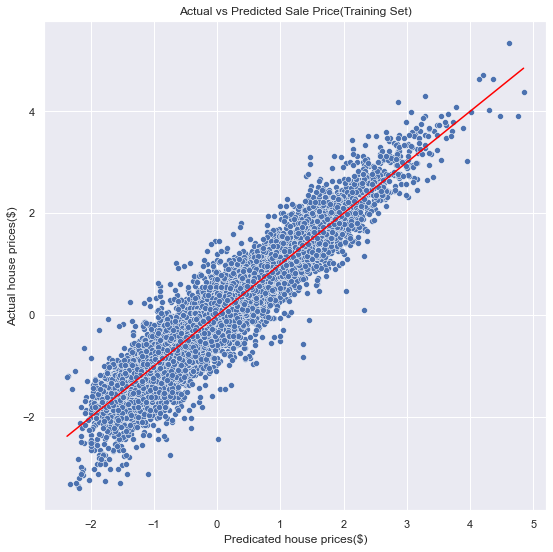

In [288]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(x=y_train_preds, y=y_train)
sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')
plt.title('Actual vs Predicted Sale Price(Training Set)')
plt.xlabel('Predicated house prices($)')
plt.ylabel('Actual house prices($)')

Text(0, 0.5, 'Actual house prices($)')

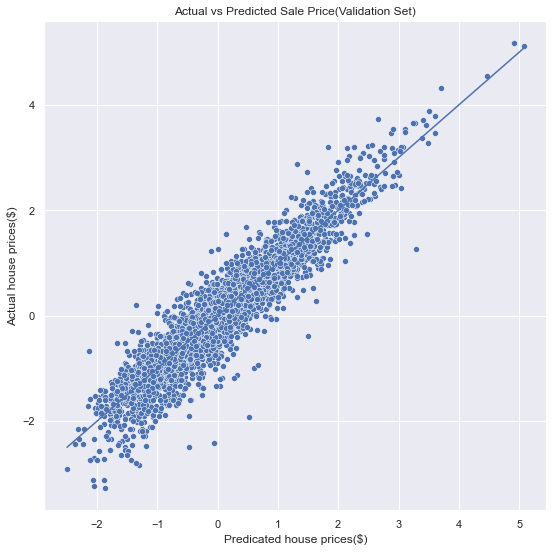

In [289]:
sns.scatterplot(x=y_val_preds, y=y_val)
sns.lineplot(x=y_val_preds, y=y_val_preds)
plt.title('Actual vs Predicted Sale Price(Validation Set)')
plt.xlabel('Predicated house prices($)')
plt.ylabel('Actual house prices($)')

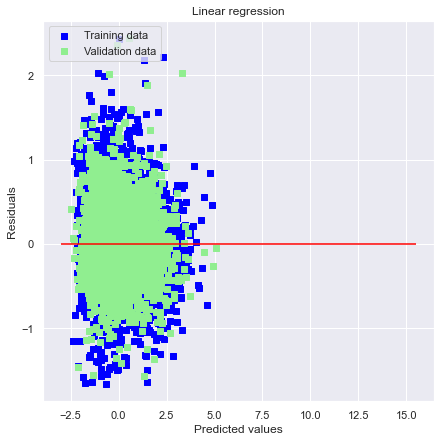

In [290]:
sns.set(rc = {'figure.figsize':(7,7)})
plt.scatter(y_train_preds, y_train_preds - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_preds, y_val_preds - y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -3, xmax = 15.5, color = "red")
plt.show()

### Regularization - we are applying ridge regularization to the above dataset - to try to contain the influence of outliers on our predictions

In [291]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2)

In [292]:
X = preprocessed.drop('price_norm', axis=1)
X= pd.concat([X, polynomial, dropped_features], axis=1)
avg_scores = get_avg_cv_score(X, y, ridge, f'Ridge w/ alpha =2')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,dataset,n_features
0,0.005386,0.004786,0.655989,0.657006,-0.343115,-0.342921,baseline,3
1,0.005585,0.004388,0.658585,0.663126,-0.340198,-0.336790,cont features pre scaling,6
2,0.005984,0.004189,0.633704,0.640273,-0.365055,-0.359645,cont(scaled) features,7
3,0.037699,0.005585,0.610047,0.619745,-0.387639,-0.380116,ohe cat features,75
4,0.006383,0.004987,0.199790,0.204785,-0.797599,-0.795030,discrete features,5
5,0.051861,0.007180,0.864410,0.866867,-0.135190,-0.133103,cont(scaled) + discrete + cat features,87
6,0.005584,0.003590,0.171338,0.177186,-0.825406,-0.822591,5 features via RFE,5
7,0.006782,0.004787,0.489812,0.491837,-0.508787,-0.508054,6 polynomial features,6
8,0.004388,0.003591,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3
9,0.005585,0.003989,0.032985,0.045464,-0.962784,-0.954265,interaction terms,3


#### Despite the regularization, our r2 values for both train and test data have decreased and the both the errors have increased slightly. This also shows that there is no undue influence of outliers in our model. Hence, we dont need to go back and drop outliers like bedroom = 33, etc. 
#### We can see that below via visualization that the residuals plots is very similar to the residual plot we have seen before


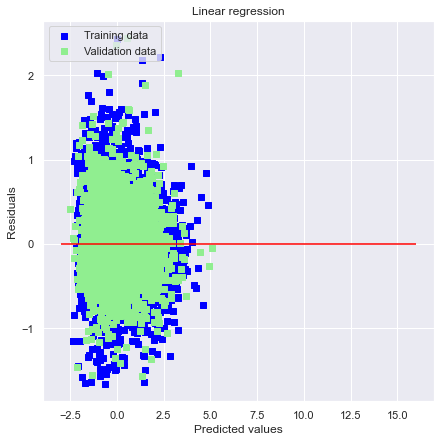

In [293]:
sns.set(rc = {'figure.figsize':(7,7)})
plt.scatter(y_train_preds, y_train_preds - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_preds, y_val_preds - y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -3, xmax = 16, color = "red")
plt.show()

# Key Takeaways: 
1. If a house has waterfront then it likely to fetch a higher price than a house without it, in the same zip code
2. If a house has renovation – then it is likely to fetch a higher price than a house without it
3. If the prospective house is below the line of fit shown before, then your house has probably scope of price appreciation and one measure which can be taken is renovation
4. We can fill in the required info on a house (not in this dataset) and see where it lies in our prediction graph and then gauge the extent of under/over pricing. 


